# <span style = "color:red"> Project 2 :  Ames Housing </span>
---

## Prolem Statement

Determining the sale price of a house is often too complicated due to the great number of features that influence pricing decision such as number of bedrooms, lot size, floor plan and etc. As a data scientist working for a real estate firm, our employer hopes to use the Ames housing data to help assess whether asking price of a house is higher or lower than the true value of the house in Ames, Iowa. If the home is undervalued, it may be a good investment for the firm. 

Our task is to explore and to find the key features that influences the sale price and develop a regression model to be able to accurately predicts the sale price for a given house in Ames, Iowa. Also, with a recommendation of top 3 features which parts of the house to improve to raise the house sale price and also 3 features that will lead to a decrease in the house sale price. 

A successful housing price prediction model should be able to predict housing prices with a root mean square error (RMSE) that is ideally lower than \\$25,000.

## Background

The great housing boom in the United States continues unabated after eight years of strong house price growth. The pandemic created a frenzied real estate market in much of the United States that has yet to let up, with demand for housing still outpacing the number of homes coming on the market, giving sellers a heavy upper hand in most of the country. A limited supply of properties in the market has added to upward house price pressure.

REAL estate investors acquired a record 18 per cent of US homes sold in the third quarter of 2021, wagering USD64 billion that home prices and rents will continue to surge. Investors bought more than 90,000 homes in the three months through September, up 10 per cent from the prior quarter and 80 per cent from a year earlier, according to a report by Redfin Corp ([*source*](https://www.businesstimes.com.sg/real-estate/property-investors-bet-us64b-on-us-homes-in-record-buying-spree)).

The S&P/Case-Shiller seasonally-adjusted national home price index rose by an amazing 19.7% during the year to July 2021 (13.61% inflation-adjusted), a sharp acceleration from the previous year’s 4.85% growth and the biggest y-o-y increase ever recorded. The median sales price of new homes sold soared 20.1% y-o-y in August 2021 to USD 390,900 according to the U.S. Census Bureau. For existing homes, the median price was up by 14.9% to USD 356,700 in August 2021 from a year earlier, according to the National Association of Realtors (NAR) ([*source*](https://www.globalpropertyguide.com/North-America/United-States/Price-History)).

## Contents:
### Part 1 Exploratory Data Analysis(EDA) & Cleaning
1. [Importing Libraries](#1.-Importing-Libraries)
2. [Importing Data](#2.-Importing-Data)
3. [Renaming Columns](#3.-Renaming-Columns)
4. [Check Data Types & Descriptive Statistics](#4.-Check-Data-Types-&-Descriptive-Statistics)
5. [Check Missing Value](#5.-Check-Missing-Value)
6. [Data Cleaning](#6.-Data-Cleaning)
7. [Exploratory Data Analysis](#7.-Exploratory-Data-Analysis)
8. [Data Dictionary](#8.-Data-Dictionary)

## Part 1 
Data Import, Exploratory Data Analysis(EDA) & Cleaning

---

### 1. Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats

# Display full output 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### 2. Importing Data

In [2]:
# Read in train & test csv file

train = pd.read_csv('../project_2/datasets/train.csv')
test = pd.read_csv('../project_2/datasets/test.csv')

In [3]:
# Check the shape & first 5 row of the train dataset

print(train.shape)
train.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


- The train dataset is large, consisting of 2051 observations/houses and 80 features including the target, sale price.

In [4]:
# Check the shape and first 5 row of the test dataset

print(test.shape)
test.head()

(878, 80)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


- The test dataset is smaller, consisting of 878 observations/houses and only 80 features excluded the target, sale price. Our primary target is to predict the sale price of test dataset.

### 3. Renaming Columns

#### 3.1 Renaming Train Dataset Columns

In [5]:
# Check all the name in train dataset columns

train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [6]:
# Renaming the train dataset columns into snake-case for naming convention

train.columns = train.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')

In [7]:
# Check if the train dataset columns rename corrently

train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

#### 3.1.2 Renaming Test Dataset Columns

In [8]:
# Check all the name in test dataset columns

test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [9]:
# Renaming the test dataset columns into snake-case for naming convention

test.columns = test.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')

In [10]:
# Check if the test dataset columns rename corrently

test.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

### 4. Check Data Types & Descriptive Statistics

#### 4.1 Train Dataset

In [11]:
# View the features of train dataset

train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [12]:
# Check the data type and missing values

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [13]:
# Check the descriptive statistics

train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,2051.0,NaN,NaN,NaN,1474.033642,843.980841,1.0,753.5,1486.0,2198.0,2930.0
pid,2051.0,NaN,NaN,NaN,713590006.091663,188691837.88533,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
ms_subclass,2051.0,NaN,NaN,NaN,57.008776,42.824223,20.0,20.0,50.0,70.0,190.0
ms_zoning,2051,7,RL,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lot_frontage,1721.0,NaN,NaN,NaN,69.0552,23.260653,21.0,58.0,68.0,80.0,313.0
lot_area,2051.0,NaN,NaN,NaN,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.5,159000.0
street,2051,2,Pave,2044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alley,140,2,Grvl,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lot_shape,2051,4,Reg,1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land_contour,2051,4,Lvl,1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- All features dtypes are correct for their representative data.
- Quite a number of feature with missing data.
- <b>pid </b>feature may be removed as it represents Parcel identification number and has no relation to the sale price.
- Few feature consist of extreme outlier such as <b>lot_area, mas_vnr_area, gr_liv_area, misc_val and also sale price</b>. It's better to remove outlier during data cleaning process as regression model is sensitive to outlier.

#### 4.2 Test Dataset

In [14]:
# View the features of test data

test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [15]:
# Check the data types and missing value 

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

In [16]:
# Check the descriptive statistics

test.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,878.0,NaN,NaN,NaN,1444.749431,850.838263,2.0,692.25,1433.0,2197.5,2928.0
pid,878.0,NaN,NaN,NaN,716286696.444191,188910255.631579,526302110.0,528484107.5,535454155.0,907190362.5,1007100110.0
ms_subclass,878.0,NaN,NaN,NaN,58.268793,42.235407,20.0,20.0,50.0,70.0,190.0
ms_zoning,878,6,RL,674,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lot_frontage,718.0,NaN,NaN,NaN,69.545961,23.533945,21.0,59.0,68.0,80.0,182.0
lot_area,878.0,NaN,NaN,NaN,10307.03303,10002.674602,1477.0,7297.25,9446.0,11589.0,215245.0
street,878,2,Pave,873,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alley,58,2,Grvl,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lot_shape,878,4,Reg,564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land_contour,878,4,Lvl,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- All features dtypes are correct for their representative data.
- Quite a number of feature with missing data.
- <b>pid</b> feature may be removed as it represents Parcel identification number and has no relation to the sale price.
- Few feature consist of extreme outlier however the data will be retained as per kaggle rules, we are not allow to remove any column as this will affect the score.

### 5. Check Missing Value

In [17]:
# Define Function to create missing value dataframe 

def missing_val(df):
    
    df_miss = df.isna().sum().reset_index()
    df_miss.columns = ['features', 'miss_val']
    df_miss['percent'] = round((df_miss['miss_val'] / df.shape[0] * 100 ), 2)
    df_miss = df_miss[df_miss['miss_val'] != 0].sort_values('miss_val', ascending = False)
    
    # Total number of features with missing values
    print(f'\nTotal number of features with missing values: {df_miss.shape[0]}\n')
    return df_miss

#### 5.1 Train Dataset Missing Value

In [18]:
# Display the summary of missing value in train dataset 

missing_val(train)


Total number of features with missing values: 26



,features,miss_val,percent
73,pool_qc,2042,99.56
75,misc_feature,1986,96.83
7,alley,1911,93.17
74,fence,1651,80.50
58,fireplace_qu,1000,48.76
4,lot_frontage,330,16.09
60,garage_yr_blt,114,5.56
65,garage_cond,114,5.56
64,garage_qual,114,5.56
61,garage_finish,114,5.56


#### 5.2 Test Dataset Missing Value

In [19]:
# Display the summary of missing value in test dataset 

missing_val(test)


Total number of features with missing values: 19



,features,miss_val,percent
73,pool_qc,874,99.54
75,misc_feature,837,95.33
7,alley,820,93.39
74,fence,706,80.41
58,fireplace_qu,422,48.06
4,lot_frontage,160,18.22
60,garage_yr_blt,45,5.13
61,garage_finish,45,5.13
64,garage_qual,45,5.13
65,garage_cond,45,5.13


### 6. Data Cleaning

#### 6.1 Train Dataset Cleaning

##### 6.1.1 pool_qc feature

In [20]:
# Find the unique element of pool_qc train dataset

train['pool_qc'].unique()

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

- Based on Data Description document, we found that <b>pool_qc</b> feature missing value should refer to houses without pool.
- This occur when read_csv interprets 'NA' as nan instead of a valid string.
- Before correction, it's better to create a new dataframe for the train csv file with na_filters = False and compare.

In [21]:
# Read in train csv file with na_filters = False
# Renaming the train_raw dataset columns into snake-case for easy to call and compare

train_raw = pd.read_csv('../project_2/datasets/train.csv', na_filter = False)

train_raw.columns = train_raw.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')

In [22]:
# Find the unique element of pool_qc train_raw dataset

train_raw['pool_qc'].unique()

array(['NA', 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

- The analysis is correct. The <b>pool_qc</b> feature missing value it is refer to houses without pool.

In [23]:
# Replace pool_qc feature missing value with 'No Pool'

train['pool_qc'] = train['pool_qc'].fillna('No Pool')

##### 6.1.2 misc_feature feature

In [24]:
# Find the unique element of misc_feature train dataset

train['misc_feature'].unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [25]:
# Find the unique element of misc_feature train_raw dataset

train_raw['misc_feature'].unique()

array(['NA', 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

- Based on Data Description document, we found that <b>misc_feature</b> feature missing value should refer to houses that no additional miscellaneous feature are not covered.
- After compare with train raw dataframe, the analysis is correct.

In [26]:
# Replace misc_feature feature missing value with 'No Misc'

train['misc_feature'] = train['misc_feature'].fillna('No Misc')

##### 6.1.3 alley feature

In [27]:
# Find the unique element of alley train dataset

train['alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [28]:
# Find the unique element of alley train_raw dataset

train_raw['alley'].unique()

array(['NA', 'Pave', 'Grvl'], dtype=object)

- Based on Data Description document, we found that <b>alley</b> feature missing value should refer to houses without alley access.
- After compare with train raw dataframe, the analysis is correct.

In [29]:
# Replace alley feature missing value with 'No Alley'

train['alley'] = train['alley'].fillna('No Alley')

##### 6.1.4 fence feature

In [30]:
# Find the unique element of fence train dataset

train['fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [31]:
# Find the unique element of fence train_raw dataset

train_raw['fence'].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

- Based on Data Description document, we found that <b>fence</b> feature missing value should refer to houses without fence.
- After compare with train raw dataframe, the analysis is correct.

In [32]:
# Replace fence feature missing value with 'No Fence'

train['fence'] = train['fence'].fillna('No Fence')

##### 6.1.5 fireplace_qu feature

In [33]:
# Find the unique element of fireplace_qu train dataset

train['fireplace_qu'].unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [34]:
# Find the unique element of fireplace_qu train_raw dataset

train_raw['fireplace_qu'].unique()

array(['NA', 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

- Based on Data Description document, we found that <b>fireplace_qu</b> feature missing value should refer to houses without fireplace.
- After compare with train raw dataframe, the analysis is correct.

In [35]:
# Replace fireplace_qu feature missing value with 'No Fireplace'

train['fireplace_qu'] = train['fireplace_qu'].fillna('No Fireplace')

In [36]:
# Display the updated summary of missing value in train dataset for midway check

missing_val(train)


Total number of features with missing values: 21



,features,miss_val,percent
4,lot_frontage,330,16.09
60,garage_yr_blt,114,5.56
64,garage_qual,114,5.56
61,garage_finish,114,5.56
65,garage_cond,114,5.56
59,garage_type,113,5.51
33,bsmt_exposure,58,2.83
36,bsmtfin_type_2,56,2.73
34,bsmtfin_type_1,55,2.68
32,bsmt_cond,55,2.68


##### 6.1.6 lot_frontage feature

In [37]:
# Find the unique element of lot_frontage train dataset

train['lot_frontage'].unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [38]:
# Find the unique element of lot_frontage train_raw dataset

train_raw['lot_frontage'].unique()

array(['', '43', '68', '73', '82', '137', '35', '70', '21', '64', '120',
       '24', '74', '93', '34', '80', '71', '72', '109', '40', '103',
       '100', '92', '65', '75', '60', '30', '79', '41', '105', '107',
       '81', '36', '63', '32', '94', '44', '50', '48', '67', '88', '83',
       '53', '58', '57', '52', '87', '134', '56', '54', '140', '78', '85',
       '90', '96', '62', '49', '59', '155', '91', '61', '86', '128', '77',
       '42', '89', '51', '69', '55', '112', '76', '125', '98', '113',
       '102', '22', '122', '84', '119', '118', '66', '95', '108', '195',
       '106', '39', '110', '130', '97', '45', '37', '123', '38', '129',
       '115', '47', '114', '104', '46', '121', '124', '313', '141', '101',
       '99', '160', '174', '26', '144', '138', '111', '25', '33', '200',
       '150', '117', '153', '116', '135'], dtype=object)

- Based on Data Description document, we found that <b>lot_frontage</b> feature missing value might refer to houses without street connecting or truly missing the linear feet of street connecting with.
- However, there is no way to verified without going back to the data collector person and there is no other feature which have link to lot_frontage.
- Since, large percentage (16%+) of value is missing, it will be more feasible to drop the whole columns than using mean/mode value. 

In [39]:
# Drop the lot_frontage column from train dataset

train.drop(columns = 'lot_frontage', inplace = True)

In [40]:
# Check the new shape of train dataset if we successfully drop lot_frontage column

train.shape

(2051, 80)

##### 6.1.7 List of garage related feature
- garage_yr_blt
- garage_cond
- garage_qual
- garage_finish
- garage_type
- garage_cars
- garage_area

In [41]:
# Display the list of garage related feature number of missing value

garage = train.filter(regex = 'garage')

garage.isnull().sum().sort_values(ascending = False)

garage_yr_blt    114
garage_finish    114
garage_qual      114
garage_cond      114
garage_type      113
garage_cars        1
garage_area        1
dtype: int64

- Based on Data Description document, we found that <b>garage_yr_blt, garage_finish, garage_qual, garage_cond & garage_type</b> feature missing value should refer to houses without garage.
- Since <b>garage_area</b> only has one missing value, we can use this feature to confirm if the houses with  <b>garage_yr_blt, garage_finish, garage_qual, garage_cond & garage_type</b> feature missing value has garage or without garage. <b>garage_area = 0</b> represent a house without garage.
- This will be very useful when we imputing garage related feature

In [42]:
# Check the number of row garage_area = 0.0

garage_area_0 = garage[(garage['garage_area'] == 0.0)]

print(f'Total number of row in garage_area feature = 0.0 is {len(garage_area_0)}\n')

# Display the first 5 row of garage_area = 0.0 & show garage related column only

garage.loc[garage_area_0.index].head()

Total number of row in garage_area feature = 0.0 is 113



,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
28,NaN,NaN,NaN,0.0,0.0,NaN,NaN
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
65,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
101,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [43]:
# Check the number of row when garage_yr_blt, garage_finish, garage_qual, garage_cond & garage_type feature is missing value & garage_area = 0.0

len(garage[(garage['garage_yr_blt'].isnull())
      & (garage['garage_cond'].isnull())
      & (garage['garage_qual'].isnull()) 
      & (garage['garage_finish'].isnull()) 
      & (garage['garage_type'].isnull()) 
      & (garage['garage_area'] == 0.0)])

113

- Interesting, all 113 row of <b>garage_area = 0.0</b> prove that all <b>garage_yr_blt, garage_finish, garage_qual, garage_cond & garage_type</b> feature is missing value.
- This confirm that 113 row of <b>garage_yr_blt, garage_finish, garage_qual, garage_cond & garage_type</b> feature missing value should refer to houses without garage.

In [44]:
# Replace 113 row garage_finish, garage_qual, garage_cond & garage_type feature missing value with 'No Garage' using index reference from garage_area_0 = 0.0

train.loc[garage_area_0.index, ['garage_finish', 'garage_qual', 'garage_cond', 'garage_type']] = 'No Garage'

# Replace 113 row garage_yr_blt feature missing value with 0 integer value to represent 'No Garage' using index reference from garage_area = 0.0

train.loc[garage_area_0.index, 'garage_yr_blt'] = 0

In [45]:
# Display the updated list of garage related feature number of missing value

garage = train.filter(regex = 'garage')

garage.isnull().sum().sort_values(ascending = False)

garage_yr_blt    1
garage_finish    1
garage_cars      1
garage_area      1
garage_qual      1
garage_cond      1
garage_type      0
dtype: int64

In [46]:
# Display the row which still has the remaining missing value for garage related feature
# Using .any() to return whether any element is True, at vertical axis.

garage[garage.isnull().any(axis = 1)]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


- Index 1712 house come with garage however all other garage related feature is missing value!!! The missing value can be replaced with mean/mode value since is just 0.05% of the data.

In [47]:
# Mean of garage_yr_blt
print(f"The mean of garage_yr_blt feature is: {int(round(train['garage_yr_blt'].mean(),0))}")

# Mode of garage_finish
print(f"The mode of garage_finish feature is: {train['garage_finish'].mode()[0]}")

# Mode of garage_cars
print(f"The mode of garage_cars feature is: {train['garage_cars'].mode()[0]}")

# Mean of garage_area
print(f"The mean of garage_area feature is: {int(round(train['garage_area'].mean(), 0))}")

# Mode of garage_qual
print(f"The mode of garage_qual feature is: {train['garage_qual'].mode()[0]}")

# Mode of garage_cond
print(f"The mode of garage_cond feature is: {train['garage_cond'].mode()[0]}")

The mean of garage_yr_blt feature is: 1870
The mode of garage_finish feature is: Unf
The mode of garage_cars feature is: 2.0
The mean of garage_area feature is: 474
The mode of garage_qual feature is: TA
The mode of garage_cond feature is: TA


In [48]:
# Replace Index 1712 house missing value with mean/mode

train.loc[1712, 'garage_yr_blt'] = 1870
train.loc[1712, 'garage_finish'] = 'Unf'
train.loc[1712, 'garage_cars'] = 2.0
train.loc[1712, 'garage_area'] = 474
train.loc[1712, 'garage_qual'] = 'TA'
train.loc[1712, 'garage_cond'] = 'TA'

In [49]:
# Display the updated list of garage related feature number of missing value

garage = train.filter(regex = 'garage')

garage.isnull().sum()

garage_type      0
garage_yr_blt    0
garage_finish    0
garage_cars      0
garage_area      0
garage_qual      0
garage_cond      0
dtype: int64

- Great! All the missing value garage related feature has been corrected.

##### 6.1.8 List of basement related feature
- bsmt_cond
- bsmt_qual
- bsmt_exposure
- bsmtfin_type_1
- bsmtfin_type_2 
- bsmt_half_bath
- bsmt_full_bath
- total_bsmt_sf
- bsmt_unf_sf
- bsmtfin_sf_1
- bsmtfin_sf_2

In [50]:
# Display the list of basement related feature number of missing value

basement = train.filter(regex = 'bsmt')

basement.isnull().sum().sort_values(ascending = False)

bsmt_exposure     58
bsmtfin_type_2    56
bsmt_qual         55
bsmt_cond         55
bsmtfin_type_1    55
bsmt_full_bath     2
bsmt_half_bath     2
bsmtfin_sf_1       1
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
dtype: int64

- Based on Data Description document, we found that <b>bsmt_exposure, bsmtfin_type_2, bsmt_qual, bsmt_cond & bsmtfin_type_1</b> feature missing value should refer to houses without basement.
- Since <b>total_bsmt_sf</b> only has one missing value, we can use this feature to confirm if the houses with <b>bsmt_exposure, bsmtfin_type_2, bsmt_qual, bsmt_cond & bsmtfin_type_1</b> feature missing value has basement or without basement. <b>total_bsmt_sf = 0</b> represent house without basement.
- This will be very useful when we imputing basement related feature.

In [51]:
# Check the number of row total_bsmt_sf = 0

total_bsmt_sf_0 = basement[basement['total_bsmt_sf'] == 0.0]

print(f'Total number of row in total_bsmt_sf feature = 0.0 is {len(total_bsmt_sf_0)}\n')

# Display the first 5 row of total_bsmt_sf = 0.0 & show basement related column only

basement.loc[total_bsmt_sf_0.index].head()

Total number of row in total_bsmt_sf feature = 0.0 is 54



,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [52]:
# Check the number of row when bsmt_exposure, bsmtfin_type_2, bsmt_qual, bsmt_cond & bsmtfin_type_1 feature is missing value & total_bsmt_sf = 0.0 

len(basement[(basement['bsmt_cond'].isnull())
      & (basement['bsmt_qual'].isnull())
      & (basement['bsmt_exposure'].isnull()) 
      & (basement['bsmtfin_type_1'].isnull()) 
      & (basement['bsmtfin_type_2'].isnull()) 
      & (basement['total_bsmt_sf'] == 0.0)])

54

- Interesting, all 54 row of <b>total_bsmt_sf = 0.0</b> prove that all <b>bsmt_exposure, bsmtfin_type_2, bsmt_qual, bsmt_cond & bsmtfin_type_1</b> feature is missing value.
- This confirm that 54 row of <b>bsmt_exposure, bsmtfin_type_2, bsmt_qual, bsmt_cond & bsmtfin_type_1</b> feature missing value should refer to houses without basement.

In [53]:
# Replace 54 row bsmt_exposure, bsmtfin_type_2, bsmt_qual, bsmt_cond & bsmtfin_type_1 feature missing value with 'No Basement' using index reference from total_bsmt_sf_0 = 0.0

train.loc[total_bsmt_sf_0.index, ['bsmt_exposure', 'bsmtfin_type_2', 'bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1']] = 'No Basement'

In [54]:
# Display the updated list of basement related feature number of missing value

basement = train.filter(regex = 'bsmt')

basement.isnull().sum().sort_values(ascending = False)

bsmt_exposure     4
bsmtfin_type_2    2
bsmt_full_bath    2
bsmt_half_bath    2
bsmt_qual         1
bsmt_cond         1
bsmtfin_type_1    1
bsmtfin_sf_1      1
bsmtfin_sf_2      1
bsmt_unf_sf       1
total_bsmt_sf     1
dtype: int64

In [55]:
# Display all 4 row of bsmt_exposure missing value 

basement[basement['bsmt_exposure'].isnull()]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1547,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1997,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


In [56]:
# Display the raw data of all 4 row of bsmt_exposure missing value 

train_raw.loc[train[train['bsmt_exposure'].isnull() == True].index].filter(regex = 'bsmt')

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
1327,,,,,,,,,,,
1456,Gd,TA,,Unf,0,Unf,0,725,725,0,0
1547,Gd,TA,,Unf,0,Unf,0,1595,1595,0,0
1997,Gd,TA,,Unf,0,Unf,0,936,936,0,0


- Index 1327 house does not has any information whether it has basement or not and all other related basement data is missing!!! Let's drop it since is just 0.05% of the whole data.
- Index 1456, 1547 & 1997 <b>bsmt_exposure</b> is missing. Since other related basement data is available, we will just replace the <b>bsmt_exposure</b> missing value with mode value.

In [57]:
# Drop index 1327 house

train.drop(index = 1327, inplace = True)

In [58]:
# Check the new shape of train dataset if we successfully drop index 1327

train.shape

(2050, 80)

In [59]:
# Mode of bsmt_exposure

print(f"The mode of bsmt_exposure feature is: {train['bsmt_exposure'].mode()[0]}")

The mode of bsmt_exposure feature is: No


In [60]:
# Replace Index 1456, 1547 & 1997 house bsmt_exposure varialble missing value with mode

train.loc[[1456, 1547, 1997], ['bsmt_exposure']] = 'No'

In [61]:
# Display the updated list of basement related feature number of missing value

basement = train.filter(regex = 'bsmt')

basement.isnull().sum().sort_values(ascending = False)

bsmtfin_type_2    1
bsmt_full_bath    1
bsmt_half_bath    1
bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_sf_1      0
bsmtfin_sf_2      0
bsmt_unf_sf       0
total_bsmt_sf     0
dtype: int64

In [62]:
# Display the remaining row that consist missing value for bsmtfin_type_2, bsmt_full_bath & bsmt_half_bath feature

basement[basement['bsmtfin_type_2'].isnull() 
         | basement['bsmt_full_bath'].isnull() 
         | basement['bsmt_half_bath'].isnull()]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
616,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,NaN,NaN
1147,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


In [63]:
# Display the raw data of all remaining row that consist missing value for bsmtfin_type_2, bsmt_full_bath & bsmt_half_bath feature

train_raw.loc[[616, 1147]].filter(regex = 'bsmt')

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
616,NA,NA,NA,NA,0,NA,0,0,0,,
1147,Gd,TA,No,GLQ,1124,,479,1603,3206,1,0


- Index 616 has no basement, <b>bsmt_full_bath &  bsmt_half_bath</b> missing value should be equal to 0.
- Index 1147 has a basement, <b>bsmtfin_sf_2</b> missing value will just be replaced with mode value of <b>bsmtfin_sf_2</b>.

In [64]:
# Replace the missing value of bsmt_full_bath & bsmt_half_bath(616) with 0 

train.loc[616, ['bsmt_full_bath', 'bsmt_half_bath']] = 0

In [65]:
# Mode of 'bsmtfin_type_2'

print(f"The mode of bsmtfin_type_2 feature is: {train['bsmtfin_type_2'].mode()[0]}")

The mode of bsmtfin_type_2 feature is: Unf


In [66]:
# Replace the missing value of bsmtfin_type_2(1147) with 'Unf' 

train.loc[1147, ['bsmtfin_type_2']] = 'Unf'

In [67]:
# Display the updated list of basement related feature number of missing value

basement = train.filter(regex = 'bsmt')

basement.isnull().sum().sort_values(ascending = False)

bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_sf_1      0
bsmtfin_type_2    0
bsmtfin_sf_2      0
bsmt_unf_sf       0
total_bsmt_sf     0
bsmt_full_bath    0
bsmt_half_bath    0
dtype: int64

- Great! All the missing value basement related feature has been corrected.

##### 6.1.9 List of masonry related feature
- mas_vnr_area
- mas_vnr_type 

In [68]:
# Display the list of masonry related feature number of missing value

masonry = train.filter(regex = 'mas')

masonry.isnull().sum().sort_values(ascending = False)

mas_vnr_type    22
mas_vnr_area    22
dtype: int64

In [69]:
# Display the row with missing value of masonry related feature

train.loc[train.isnull().any(axis=1), ['mas_vnr_area', 'mas_vnr_type']]

,mas_vnr_area,mas_vnr_type
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN
338,NaN,NaN
431,NaN,NaN
451,NaN,NaN
591,NaN,NaN
844,NaN,NaN


In [70]:
# Display the total number of row with missing value

print(len(train.loc[train.isnull().any(axis=1), ['mas_vnr_area', 'mas_vnr_type']]))

22


In [71]:
# Display the raw data of all mas_vnr_type missing value  

train_raw.loc[train[train['mas_vnr_type'].isnull() == True].index].filter(regex = 'mas')

,mas_vnr_type,mas_vnr_area
22,,
41,,
86,,
212,,
276,,
338,,
431,,
451,,
591,,
844,,


- All the row with <b>mas_vnr_area</b> missing value also consist of <b>mas_vnr_type</b> missing value!!!
- There are no other feature has linkage and can validate for <b>mas_vnr_area & mas_vnr_type</b>.
- <b>mas_vnr_type & mas_vnr_area</b> will be replaced with mode value.

In [72]:
# Mode of mas_vnr_area & mas_nvr_type 

print(f"The mode of mas_vnr_area feature is: {train['mas_vnr_area'].mode()[0]}")
print(f"The mode of mas_vnr_type feature is: {train['mas_vnr_type'].mode()[0]}")

The mode of mas_vnr_area feature is: 0.0
The mode of mas_vnr_type feature is: None


In [73]:
# Replace the missing value of mas_nvr_type with 'None' 

train.loc[train['mas_vnr_type'].isnull(), 'mas_vnr_type'] = 'None'

In [74]:
# Replace the missing value of mas_vnr_area with 0.0 

train.loc[train['mas_vnr_area'].isnull(), 'mas_vnr_area'] = 0.0

In [75]:
# Check if there is still any missing value in train dataset

missing_val(train) 


Total number of features with missing values: 0



,features,miss_val,percent


#### 6.2 Test Dataset Cleaning

##### 6.2.1 pool_qc feature

In [76]:
# Find the unique element of pool_qc test dataset

test['pool_qc'].unique()

array([nan, 'Ex', 'TA'], dtype=object)

- Similar to train dataset, based on Data Description document, we found that <b>pool_qc</b> feature missing value should refer to houses without pool.
- This occur when read_csv interprets 'NA' as nan instead of a valid string.
- Before correction, it's better to create a new dataframe for the test csv file with na_filters = False and compare.

In [77]:
# Read in test csv file with na_filters = False
# Renaming the test_raw dataset columns into snake-case for easy to call and compare

test_raw = pd.read_csv('../project_2/datasets/test.csv', na_filter = False)

test_raw.columns = test_raw.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')

In [78]:
# Find the unique element of pool_qc test_raw dataset

test_raw['pool_qc'].unique()

array(['NA', 'Ex', 'TA'], dtype=object)

- The analysis is correct. The <b>pool_qc</b> feature missing value it is refer to houses without pool.

In [79]:
# Replace pool_qc feature missing value with 'No Pool'

test['pool_qc'] = test['pool_qc'].fillna('No Pool')

##### 6.2.2 misc_feature feature

In [80]:
# Find the unique element of misc_feature test dataset

test['misc_feature'].unique()

array([nan, 'Shed', 'Othr', 'Gar2'], dtype=object)

In [81]:
# Find the unique element of misc_feature test_raw dataset

test_raw['misc_feature'].unique()

array(['NA', 'Shed', 'Othr', 'Gar2'], dtype=object)

- Similar to train dataset, based on Data Description document, we found that <b>misc_feature</b> feature missing value should refer to houses that no additional miscellaneous feature are not covered.
- After compare with test raw dataframe, the analysis is correct.

In [82]:
# Replace misc_feature feature missing value with 'No Misc'

test['misc_feature'] = test['misc_feature'].fillna('No Misc')

##### 6.2.3 alley feature

In [83]:
# Find the unique element of alley test dataset

test['alley'].unique()

array(['Grvl', nan, 'Pave'], dtype=object)

In [84]:
# Find the unique element of alley test_raw dataset

test_raw['alley'].unique()

array(['Grvl', 'NA', 'Pave'], dtype=object)

- Similar to train dataset, based on Data Description document, we found that <b>alley</b> feature missing value should refer to houses without alley access.
- After compare with test raw dataframe, the analysis is correct.

In [85]:
# Replace alley feature missing value with 'No Alley'

test['alley'] = test['alley'].fillna('No Alley')

##### 6.2.4 fence feature

In [86]:
# Find the unique element of fence test dataset

test['fence'].unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [87]:
# Find the unique element of fence test_raw dataset

test_raw['fence'].unique()

array(['NA', 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

- Similar to train dataset, based on Data Description document, we found that <b>fence</b> feature missing value should refer to houses without fence.
- After compare with test raw dataframe, the analysis is correct.

In [88]:
# Replace fence feature missing value with 'No Fence'

test['fence'] = test['fence'].fillna('No Fence')

##### 6.2.5 fireplace_qu feature

In [89]:
# Find the unique element of fireplace_qu test dataset

test['fireplace_qu'].unique()

array([nan, 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

In [90]:
# Find the unique element of fireplace_qu test_raw dataset

test_raw['fireplace_qu'].unique()

array(['NA', 'Gd', 'Fa', 'TA', 'Po', 'Ex'], dtype=object)

- Similar to train dataset, based on Data Description document, we found that <b>fireplace_qu</b> feature missing value should refer to houses without fireplace.
- After compare with test raw dataframe, the analysis is correct.

In [91]:
# Replace fireplace_qu feature missing value with 'No Fireplace'

test['fireplace_qu'] = test['fireplace_qu'].fillna('No Fireplace')

In [92]:
# Display the updated summary of missing value in test dataset for midway check

missing_val(test)


Total number of features with missing values: 14



,features,miss_val,percent
4,lot_frontage,160,18.22
60,garage_yr_blt,45,5.13
61,garage_finish,45,5.13
64,garage_qual,45,5.13
65,garage_cond,45,5.13
59,garage_type,44,5.01
31,bsmt_qual,25,2.85
32,bsmt_cond,25,2.85
33,bsmt_exposure,25,2.85
34,bsmtfin_type_1,25,2.85


##### 6.2.6 lot_frontage feature

In [93]:
# Find the unique element of lot_frontage test dataset

test['lot_frontage'].unique()

array([ 69.,  nan,  58.,  60.,  21.,  52.,  39.,  75.,  50.,  68.,  80.,
       121.,  51.,  65.,  74.,  73.,  40.,  46.,  61.,  85., 136.,  34.,
        70.,  59., 100.,  77., 131.,  67.,  79.,  98.,  53.,  95.,  37.,
       106.,  90., 120.,  72.,  76., 118.,  24.,  78.,  86., 102.,  66.,
       112.,  63.,  57., 110.,  89., 103., 105.,  48.,  43., 160.,  31.,
        55.,  84.,  44., 150.,  35.,  64.,  71., 122., 174.,  49.,  47.,
        93., 130.,  56., 149.,  87., 168.,  82.,  36.,  41.,  96.,  88.,
        83.,  45.,  94.,  54.,  30., 124.,  81.,  42., 152., 115., 113.,
       101., 104., 116.,  62., 114., 107.,  33.,  99.,  91.,  97., 126.,
        28., 108., 133.,  32.,  92., 182.])

In [94]:
# Find the unique element of lot_frontage test_raw dataset

test_raw['lot_frontage'].unique()

array(['69', '', '58', '60', '21', '52', '39', '75', '50', '68', '80',
       '121', '51', '65', '74', '73', '40', '46', '61', '85', '136', '34',
       '70', '59', '100', '77', '131', '67', '79', '98', '53', '95', '37',
       '106', '90', '120', '72', '76', '118', '24', '78', '86', '102',
       '66', '112', '63', '57', '110', '89', '103', '105', '48', '43',
       '160', '31', '55', '84', '44', '150', '35', '64', '71', '122',
       '174', '49', '47', '93', '130', '56', '149', '87', '168', '82',
       '36', '41', '96', '88', '83', '45', '94', '54', '30', '124', '81',
       '42', '152', '115', '113', '101', '104', '116', '62', '114', '107',
       '33', '99', '91', '97', '126', '28', '108', '133', '32', '92',
       '182'], dtype=object)

- Similar to train dataset, based on Data Description document, we found that <b>lot_frontage</b> feature missing value might refer to houses without street connecting or truly missing the linear feet of street connecting with.
- However, there is no way to verified without going back to the data collector person and there is no other feature which have link to lot_frontage.
- Since, <b>lot_frontage</b> column in train dataset has been dropped, we will do the same for test dataset. 

In [95]:
# Drop the lot_frontage column from test dataset

test.drop(columns = 'lot_frontage', inplace = True)

In [96]:
# Check the new shape of test dataset if we successfully drop lot_frontage column

test.shape

(878, 79)

##### 6.2.7 List of garage related feature
- garage_yr_blt
- garage_cond
- garage_qual
- garage_finish
- garage_type

In [97]:
# Display the list of garage related feature number of missing value

garage = test.filter(regex = 'garage')

garage.isnull().sum().sort_values(ascending = False)

garage_yr_blt    45
garage_finish    45
garage_qual      45
garage_cond      45
garage_type      44
garage_cars       0
garage_area       0
dtype: int64

- Similar to train dataset, based on Data Description document, we found that <b>garage_yr_blt, garage_finish, garage_qual, garage_cond & garage_type</b> feature missing value should refer to houses without garage.
- Since <b>garage_area</b> only has no missing value, we can use this feature to confirm if the houses with <b>garage_yr_blt, garage_finish, garage_qual, garage_cond & garage_type</b> feature missing value has garage or without garage. <b>garage_area = 0</b> represent house without garage.
- This will be very useful when we imputing garage related feature

In [98]:
# Check the number of row garage_area = 0.0

garage_area_0 = garage[(garage['garage_area'] == 0.0)]

print(f'Total number of row in garage_area feature = 0.0 is {len(garage_area_0)}\n')

# Display the first 5 row of garage_area = 0.0 & show garage related column only

garage.loc[garage_area_0.index].head()

Total number of row in garage_area feature = 0.0 is 44



,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
29,NaN,NaN,NaN,0,0,NaN,NaN
45,NaN,NaN,NaN,0,0,NaN,NaN
66,NaN,NaN,NaN,0,0,NaN,NaN
68,NaN,NaN,NaN,0,0,NaN,NaN
105,NaN,NaN,NaN,0,0,NaN,NaN


In [99]:
# Check the number of row when garage_yr_blt, garage_finish, garage_qual, garage_cond, garage_type feature is missing value & garage_area = 0.0

len(garage[(garage['garage_yr_blt'].isnull())
      & (garage['garage_cond'].isnull())
      & (garage['garage_qual'].isnull()) 
      & (garage['garage_finish'].isnull()) 
      & (garage['garage_type'].isnull()) 
      & (garage['garage_area'] == 0.0)])

44

- Interesting, all 44 row of <b>garage_area = 0.0</b> prove that all <b>garage_yr_blt, garage_finish, garage_qual, garage_cond & garage_type</b> feature is missing value.
- This confirm that 44 row of <b>garage_yr_blt, garage_finish, garage_qual, garage_cond & garage_type</b> feature missing value should refer to houses without garage.

In [100]:
# Replace 44 row garage_finish, garage_qual, garage_cond & garage_type feature missing value with 'No Garage' using index reference from garage_area_0 = 0.0

test.loc[garage_area_0.index, ['garage_finish', 'garage_qual', 'garage_cond', 'garage_type']] = 'No Garage'

# Replace 44 row garage_yr_blt feature missing value with 0 integer value to represent 'No Garage' using index reference from garage_area = 0.0

test.loc[garage_area_0.index, 'garage_yr_blt'] = 0

In [101]:
# Display the updated list of garage related feature number of missing value

garage = test.filter(regex = 'garage')

garage.isnull().sum().sort_values(ascending = False)

garage_yr_blt    1
garage_finish    1
garage_qual      1
garage_cond      1
garage_type      0
garage_cars      0
garage_area      0
dtype: int64

In [102]:
# Display the row which still has the remaining missing value for garage related feature
# Using .any() to return whether any element is True, at vertical axis.

garage[garage.isnull().any(axis = 1)]

,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond
764,Detchd,NaN,NaN,1,360,NaN,NaN


- Index 764 house come with garage however all other garage related feature is missing value!!! The missing value can be replaced with mean/mode value since is just 0.11% of the data.

In [103]:
# Mean of garage_yr_blt
print(f"The mean of garage_yr_blt feature is: {int(round(test['garage_yr_blt'].mean(), 0))}")

# Mode of garage_finish
print(f"The mode of garage_finish feature is: {test['garage_finish'].mode()[0]}")

# Mode of garage_qual
print(f"The mode of garage_qual feature is: {test['garage_qual'].mode()[0]}")

# Mode of garage_cond
print(f"The mode of garage_cond feature is: {test['garage_cond'].mode()[0]}")

The mean of garage_yr_blt feature is: 1878
The mode of garage_finish feature is: Unf
The mode of garage_qual feature is: TA
The mode of garage_cond feature is: TA


In [104]:
# Replace Index 764 house missing value with mean/mode

test.loc[764, 'garage_yr_blt'] = 1878
test.loc[764, 'garage_finish'] = 'Unf'
test.loc[764, 'garage_qual'] = 'TA'
test.loc[764, 'garage_cond'] = 'TA'

In [105]:
# Display the updated list of garage related feature number of missing value

garage = test.filter(regex = 'garage')

garage.isnull().sum()

garage_type      0
garage_yr_blt    0
garage_finish    0
garage_cars      0
garage_area      0
garage_qual      0
garage_cond      0
dtype: int64

- Great! All the missing value garage related feature has been corrected.

##### 6.2.8 List of basement related feature
- bsmt_qual
- bsmt_cond
- bsmt_exposure
- bsmtfin_type_1
- bsmtfin_type_2 

In [106]:
# Display the list of basement related feature number of missing value

basement = test.filter(regex = 'bsmt')

basement.isnull().sum().sort_values(ascending = False)

bsmt_qual         25
bsmt_cond         25
bsmt_exposure     25
bsmtfin_type_1    25
bsmtfin_type_2    25
bsmtfin_sf_1       0
bsmtfin_sf_2       0
bsmt_unf_sf        0
total_bsmt_sf      0
bsmt_full_bath     0
bsmt_half_bath     0
dtype: int64

- Similar to train dataset, based on Data Description document, we found that <b>bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1 & bsmtfin_type_2</b> feature missing value should refer to houses without basement.
- Since <b>total_bsmt_sf</b> only has no missing value, we can use this feature to confirm if the houses with <b>bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1 & bsmtfin_type_2</b> feature missing value has basement or without basement. <b>total_bsmt_sf = 0</b> represent house without garage.
- This will be very useful when we imputing basement related feature.

In [107]:
# Check the number of row total_bsmt_sf = 0

total_bsmt_sf_0 = basement[basement['total_bsmt_sf'] == 0.0]

print(f'Total number of row in total_bsmt_sf feature = 0.0 is {len(total_bsmt_sf_0)}\n')

# Display the first 5 row of total_bsmt_sf = 0.0 & show basement related column only

basement.loc[total_bsmt_sf_0.index].head()

Total number of row in total_bsmt_sf feature = 0.0 is 25



,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,bsmt_full_bath,bsmt_half_bath
15,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
37,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
76,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
78,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
112,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


In [108]:
# Check the number of row when bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1 & bsmtfin_type_2 vfeature is missing value & total_bsmt_sf = 0.0 

len(basement[(basement['bsmt_qual'].isnull())
      & (basement['bsmt_cond'].isnull())
      & (basement['bsmt_exposure'].isnull()) 
      & (basement['bsmtfin_type_1'].isnull()) 
      & (basement['bsmtfin_type_2'].isnull()) 
      & (basement['total_bsmt_sf'] == 0.0)])

25

- Interesting, all 25 row of <b>total_bsmt_sf = 0.0</b> prove that all <b>bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1 & bsmtfin_type_2</b> feature is missing value.
- This confirm that 25 row of <b>bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1 & bsmtfin_type_2</b> feature missing value should refer to houses without basement.

In [109]:
# Replace 25 row bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type_1 & bsmtfin_type_2 feature missing value with 'No Basement' using index reference from total_bsmt_sf_0 = 0.0

test.loc[total_bsmt_sf_0.index, ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2']] = 'No Basement'

In [110]:
# Display the updated list of basement related feature number of missing value

basement = test.filter(regex = 'bsmt')

basement.isnull().sum().sort_values(ascending = False)

bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_sf_1      0
bsmtfin_type_2    0
bsmtfin_sf_2      0
bsmt_unf_sf       0
total_bsmt_sf     0
bsmt_full_bath    0
bsmt_half_bath    0
dtype: int64

- Great! All the missing value basement related feature has been corrected.

##### 6.2.9 List of masonry related feature
- mas_vnr_area
- mas_vnr_type 

In [111]:
# Display the list of masonry related feature number of missing value

masonry = test.filter(regex = 'mas')

masonry.isnull().sum().sort_values(ascending = False)

mas_vnr_type    1
mas_vnr_area    1
dtype: int64

In [112]:
# Display the list of row with missing value

masonry.loc[masonry['mas_vnr_area'].isnull(), ['mas_vnr_area', 'mas_vnr_type']]

,mas_vnr_area,mas_vnr_type
865,NaN,NaN


- Index 865 with <b>mas_vnr_area</b> missing value also consist of <b>mas_nvr_type</b> missing value!!!
- There are no other feature has linkage and can validate for <b>mas_vnr_area & mas_vnr_type</b>.
- <b>mas_vnr_type & mas_vnr_area</b> will be replaced with mode value.

In [113]:
# Mode of mas_vnr_area & mas_nvr_type 

print(f"The mode of mas_vnr_area feature is: {test['mas_vnr_area'].mode()[0]}")
print(f"The mode of mas_vnr_type feature is: {test['mas_vnr_type'].mode()[0]}")

The mode of mas_vnr_area feature is: 0.0
The mode of mas_vnr_type feature is: None


In [114]:
# Replace the missing value of mas_nvr_type with 'None' 

test.loc[865, 'mas_vnr_type'] = 'None'

In [115]:
# Replace the missing value of mas_vnr_area with 0.0 

test.loc[865, 'mas_vnr_area'] = 0.0

In [116]:
# Check if there is still any missing value in test dataset

missing_val(test)


Total number of features with missing values: 1



,features,miss_val,percent
42,electrical,1,0.11


##### 6.2.10 electrical feature

In [117]:
test.loc[test['electrical'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
634,1578,916386080,80,RL,9735,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,No Fireplace,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,No Pool,No Fence,No Misc,0,5,2008,WD


- Index 634 house <b>electrical</b> feature is missing value!!! The missing value can be replaced with mode value since we can not drop any row.

In [118]:
# Mode of electrical

print(f"The mode of electrical feature is: {test['electrical'].mode()[0]}")

The mode of electrical feature is: SBrkr


In [119]:
# Replace Index 634 house electrical feature missing value with mode

test.loc[634, 'electrical'] = 'SBrkr'

In [120]:
# Check if there is still any missing value in test dataset

missing_val(test)


Total number of features with missing values: 0



,features,miss_val,percent


### 7. Exploratory Data Analysis

#### 7.1 Visualize Numerical feature

In [121]:
# Get the list of numerical feature

num_vars = list(train.dtypes[train.dtypes != 'object'].index)

In [122]:
# Number of numerical feature

len(num_vars)

38

In [123]:
# Display the first 5 rows to visualize

train[num_vars].head()

,id,pid,ms_subclass,lot_area,overall_qual,overall_cond,year_built,year_remod_add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
0,109,533352170,60,13517,6,8,1976,2005,289.0,533.0,0.0,192.0,725.0,725,754,0,1479,0.0,0.0,2,1,3,1,6,0,1976.0,2.0,475.0,0,44,0,0,0,0,0,3,2010,130500
1,544,531379050,60,11492,7,5,1996,1997,132.0,637.0,0.0,276.0,913.0,913,1209,0,2122,1.0,0.0,2,1,4,1,8,1,1997.0,2.0,559.0,0,74,0,0,0,0,0,4,2009,220000
2,153,535304180,20,7922,5,7,1953,2007,0.0,731.0,0.0,326.0,1057.0,1057,0,0,1057,1.0,0.0,1,0,3,1,5,0,1953.0,1.0,246.0,0,52,0,0,0,0,0,1,2010,109000
3,318,916386060,60,9802,5,5,2006,2007,0.0,0.0,0.0,384.0,384.0,744,700,0,1444,0.0,0.0,2,1,3,1,7,0,2007.0,2.0,400.0,100,0,0,0,0,0,0,4,2010,174000
4,255,906425045,50,14235,6,8,1900,1993,0.0,0.0,0.0,676.0,676.0,831,614,0,1445,0.0,0.0,2,0,3,1,6,0,1957.0,2.0,484.0,0,59,0,0,0,0,0,3,2010,138500


- Since the list of numerical feature is long. It would be better to seperate into 3 list to visualize the data.

In [124]:
# Separate the numerical feature list into 3 list

num_vars_1 = num_vars[:13]
num_vars_2 = num_vars[13:26]
num_vars_3 = num_vars[26:38]

##### 7.1.1 Heatmap

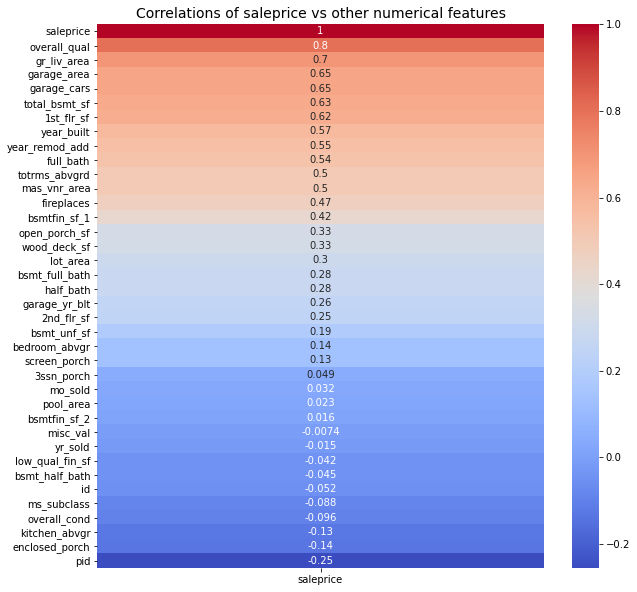

In [125]:
# Plot heatmap using seaborn to visualize correlations between saleprice vs all numerical features

# Set the plot figure size
plt.figure(figsize = (10,10))

# Find the pairwise correlation of all columns in dataframe
corr = train.corr()

# Draw the heatmap sorted by saleprice
sns.heatmap(corr[['saleprice']].sort_values(by='saleprice', ascending = False), cmap = 'coolwarm',  annot = True)

# Set the heatmap title
plt.title('Correlations of saleprice vs other numerical features', fontsize = 14)

plt.show()

- <b>Overall_qual, gr_liv_area, garage_area, garage_cars, total_bsmt_sf & 1st_flr_sf</b> is highly correlated with <b>saleprice</b>.
- Quite a number of features has no impact on the <b>saleprice</b>. e.g <b>pid, emclosed_porch, kitchen_abvgr</b> & etc.
- Further exploration with histogram & scatterplot for better viewing.

##### 7.1.2 Histogram

In [126]:
# Define a function to plot histogram of saleprice vs numerical features 

def histograms(df, x_vars):
    
    # Set the number of rows/columns and figure size for subplots
    nrows = int(np.ceil(len(x_vars)/3)) 
    ncols = 3
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, sharey = False, figsize = (18,18))
    
    # Change a multi-dimensional array into a contiguous flattened array.
    ax = ax.ravel()  
    
    # Draw the histogram
    for i, var in enumerate(x_vars): 
        sns.histplot(data = df, x = var, kde = True, ax = ax[i])
        ax[i].set_title(f'Histogram of {var} Features', fontsize = 13)
        ax[i].set_xlabel(var)
        ax[i].tick_params(labelsize=10)
        ax[i].grid()
    
    # Hide unused plots
    for i in range(nrows * ncols - len(x_vars)):
        ax[-i-1].set_visible(False) # Start from -1
        
    plt.suptitle('Histograms of Numerical Features', fontsize = 16, y = 1.015)
    
    plt.tight_layout() 

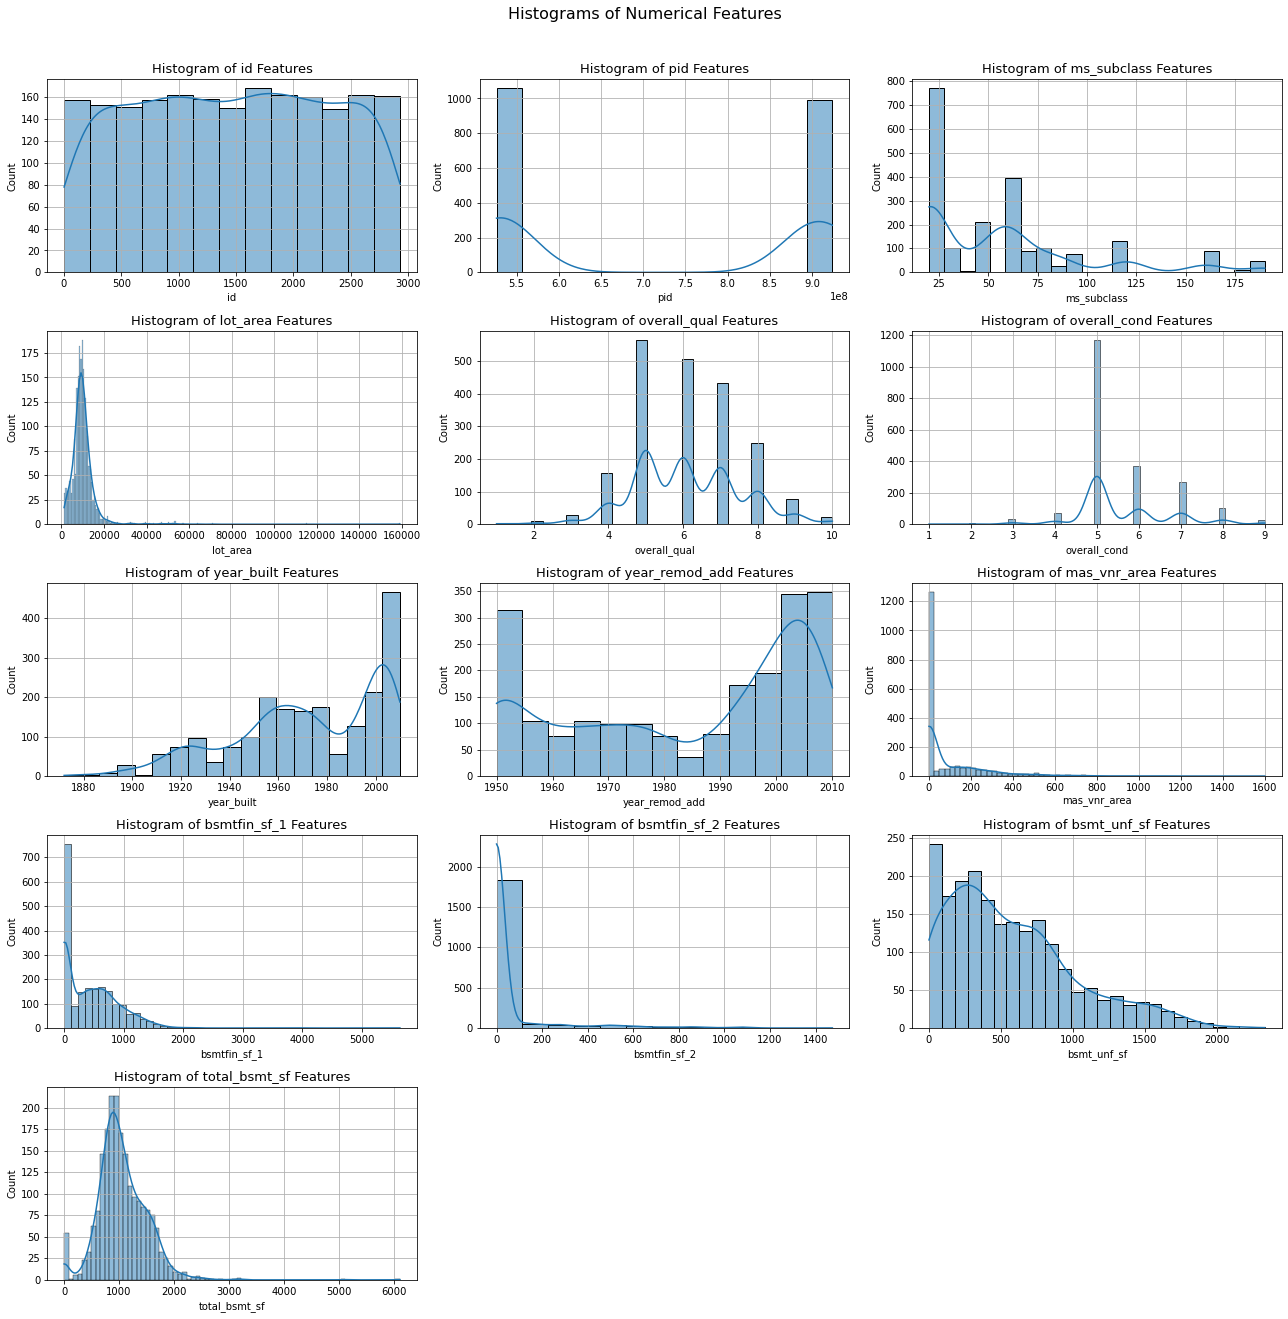

In [127]:
# Plot histograms of first 13 numerical features

histograms(train, num_vars_1)

- Based on our distribution of numerical features above, features such as <b>lot_area</b> are significantly right-skewed. A (linear) model fits better on normally distributed data. Therefore, is better to transform the skewed right <b>lot_area</b> feature by doing log transformation.
- Feature related to square feet is good to create a total square feet as new feature. Thou, <b>total_bmst_sf</b> seem to be significantly right_skewed but it's probably due to outlier.
- Some of the features seem to have outlier which will be handle after viewing clearly using scatterplot.

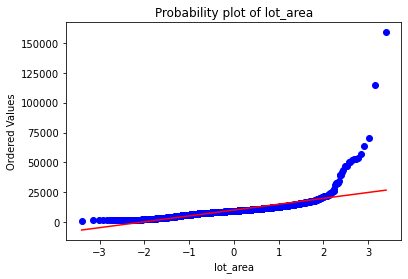

In [128]:
# Check the normality of lot_area feature

stats.probplot(train['lot_area'], plot=plt)
plt.title('Probability plot of lot_area', fontsize=12)
plt.tick_params(labelsize = 10)
plt.xlabel('lot_area', fontsize=10)
plt.show()

- Looking at the graph above, we see an weak upward slope linear relationship. This signal to us that the <b>lot_area</b> distribution we are working with is not perfectly normal distributed. Thus, log transformation is needed.

In [129]:
# Log Transformation on lot_area for train & test dataset and assign to a new variable

train['log_lot_area'] = np.log1p(train['lot_area'])
test['log_lot_area'] = np.log1p(test['lot_area'])

# Drop the lot_area from train & test dataset

train.drop(columns = ['lot_area'], inplace = True)
test.drop(columns = ['lot_area'], inplace = True)

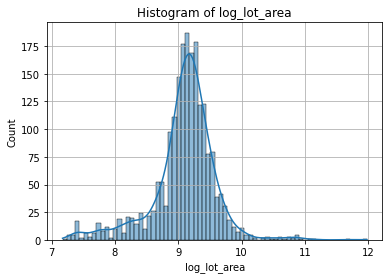

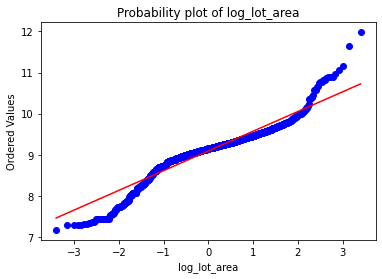

In [130]:
# Check the normality & histogram plot of log transformed lot_area feature

# Properties of Histogram
sns.histplot(train['log_lot_area'], kde = True)
plt.grid()
plt.title('Histogram of log_lot_area', fontsize=12)
fig = plt.figure()

# Properties of Probability Plot
stats.probplot(train['log_lot_area'], plot=plt)
plt.title('Probability plot of log_lot_area', fontsize=12)
plt.tick_params(labelsize = 10)
plt.xlabel('log_lot_area', fontsize=10)
plt.show()

- Now the histogram and probability plot look much better!

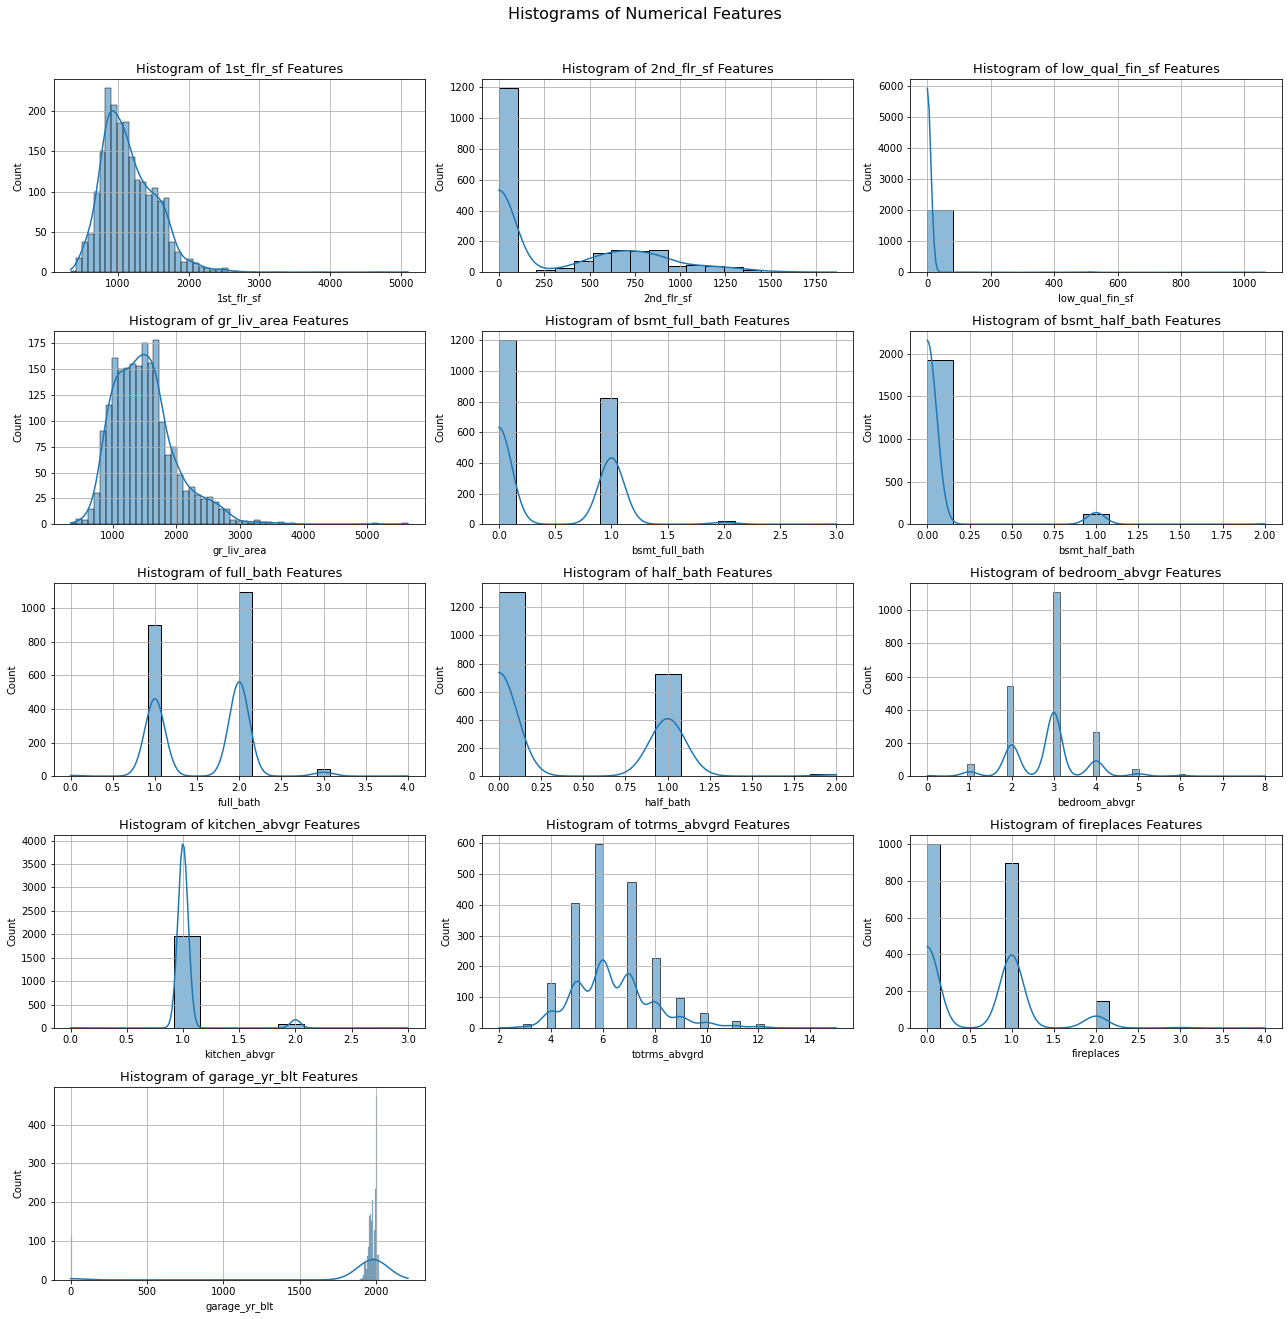

In [131]:
# Plot histograms of second 13 numerical features

histograms(train, num_vars_2)

- Based on our distribution of numerical features above, features such as <b>gr_liv_area</b> are significantly right-skewed. A (linear) model fits better on normally distributed data. Therefore, is better to transform the skewed right <b>gr_liv_area</b> feature by doing log transformation.
- Other feature related to square feet is good to create a total square feet as new feature. Thou, <b>1st_flr_sf</b> seem to be significantly right_skewed.
- Some of the features seem to have outlier.

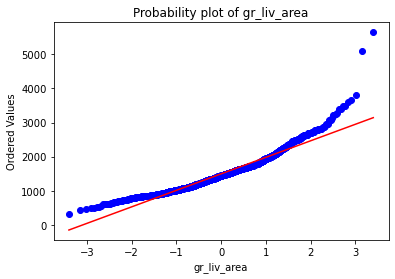

In [132]:
# Check the normality of gr_liv_area feature

stats.probplot(train['gr_liv_area'], plot=plt)
plt.title('Probability plot of gr_liv_area', fontsize=12)
plt.tick_params(labelsize = 10)
plt.xlabel('gr_liv_area', fontsize=10)
plt.show()

- Looking at the graph above, we see an upward slope linear relationship. However, the <b>gr_liv_area</b> distribution we are working with is still not perfectly normal distributed. Thus, log transformation is needed.

In [133]:
# Log Transformation on gr_liv_area for train & test dataset and assign to a new variable

train['log_gr_liv_area'] = np.log1p(train['gr_liv_area'])
test['log_gr_liv_area'] = np.log1p(test['gr_liv_area'])

# Drop the gr_liv_area from train & test dataset

train.drop(columns = ['gr_liv_area'], inplace = True)
test.drop(columns = ['gr_liv_area'], inplace = True)

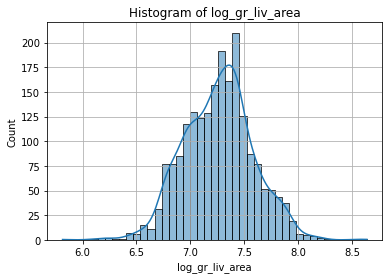

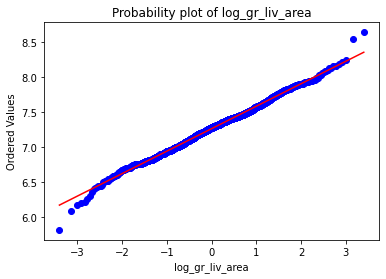

In [134]:
# Check the normality & histrogram of log transformed gr_liv_area feature

# Properties of Histogram
sns.histplot(train['log_gr_liv_area'], kde = True)
plt.grid()
plt.title('Histogram of log_gr_liv_area', fontsize=12)
fig = plt.figure()

# Properties of Probability Plot
stats.probplot(train['log_gr_liv_area'], plot=plt)
plt.title('Probability plot of log_gr_liv_area', fontsize=12)
plt.tick_params(labelsize = 10)
plt.xlabel('log_gr_liv_area', fontsize=10)
plt.show()

- Now the histogram and probability plot look much better! With some outlier which will be handle after vieweing with scatterplot.

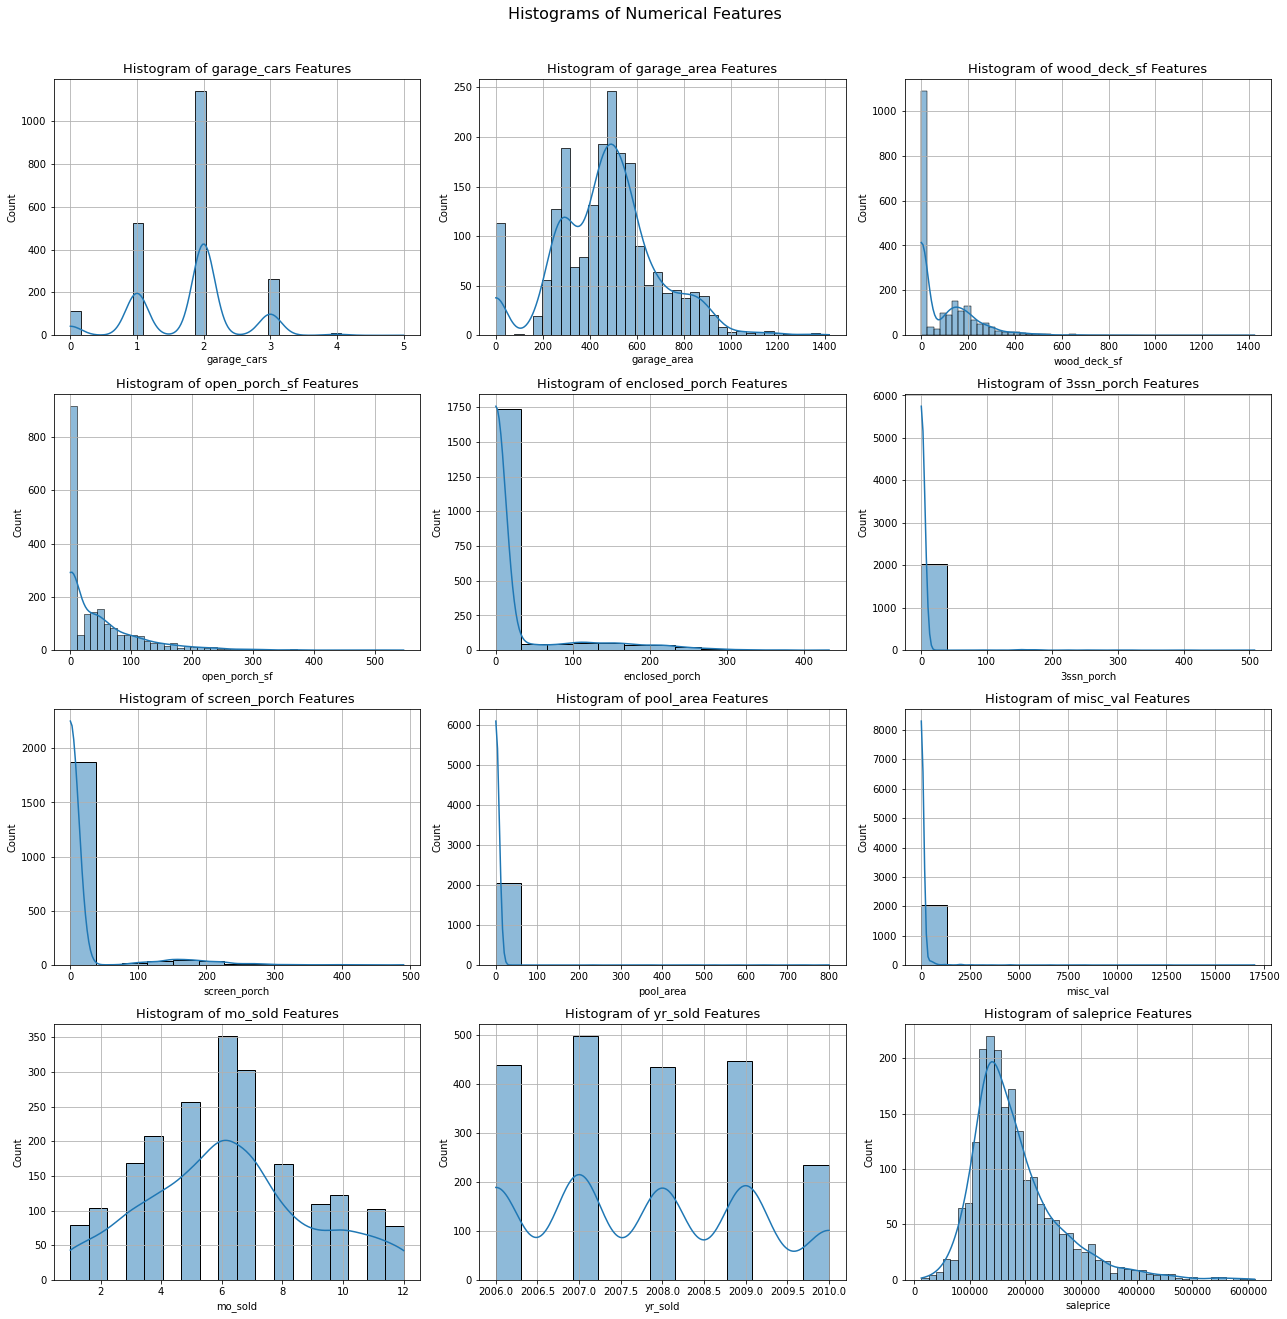

In [135]:
# Plot histograms of last 12 numerical features

histograms(train, num_vars_3)

- Based on our distribution of numerical features above, features such as <b>saleprice</b> are significantly right-skewed. A (linear) model fits better on normally distributed data. Therefore, is better to transform the skewed right salesprice feature by doing log transformation.
- We can also see that some feature have very little variance, such as <b>3ssn_porch, screen_porch, pool_area & misc_val</b>. This means that they'll be somewhat ineffective in predicting saleprice.

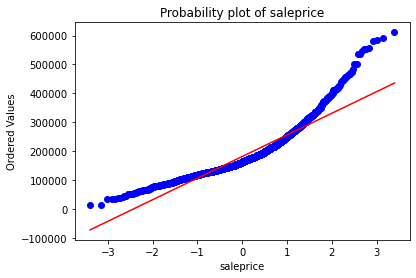

In [136]:
# Check the normality of saleprice feature

stats.probplot(train['saleprice'], plot=plt)
plt.title('Probability plot of saleprice', fontsize=12)
plt.tick_params(labelsize = 10)
plt.xlabel('saleprice', fontsize=10)
plt.show()

- Looking at the graph above, we also see that the <b>saleprice</b> distribution we are working with is not perfectly normal distributed. Thus, log transformation is needed.

In [137]:
# Log Transformation on saleprice and assign to a new variable

train['log_saleprice'] = np.log1p(train['saleprice'])

# Drop the saleprice from train dataset

train.drop(columns = ['saleprice'], inplace = True)

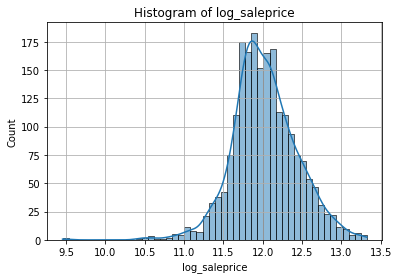

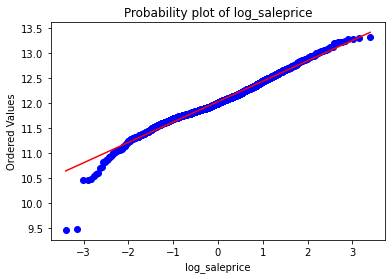

In [138]:
# Check the normality of log transformed saleprice feature

# Properties of Histogram
sns.histplot(train['log_saleprice'], kde = True)
plt.grid()
plt.title('Histogram of log_saleprice', fontsize=12)
fig = plt.figure()

# Properties of Probability Plot
stats.probplot(train['log_saleprice'], plot=plt)
plt.title('Probability plot of log_saleprice', fontsize=12)
plt.tick_params(labelsize = 10)
plt.xlabel('log_saleprice', fontsize=10)
plt.show()

- Now the histogram and probability plot look much better! With some outlier which will be handle after vieweing with scatterplot.

##### 7.1.3  Scatterplot

In [139]:
# Get the new list of numerical feature due to new assigned variable

num_vars = list(train.dtypes[train.dtypes != 'object'].index)

In [140]:
# Separate the numerical feature list into 3 list

num_vars_1 = num_vars[:13]
num_vars_2 = num_vars[13:26]
num_vars_3 = num_vars[26:38]

In [141]:
# Define a function to plot scatterplot of log_saleprice vs numerical features 

def scatterplot(df, x_vars, target):
    
    # Set the number of rows/columns and figure size for subplots
    nrows = int(np.ceil(len(x_vars)/3)) 
    ncols = 3
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, sharey = False, figsize = (18,18))
    
    # Change a multi-dimensional array into a contiguous flattened array.
    ax = ax.ravel()  
    
    # Draw the scatterplot
    for i, var in enumerate(x_vars):
        
        # Set the scatterplot properties
        g = sns.regplot(data = df, x = var, y = target, ax = ax[i], marker = 'o', color = 'blue', line_kws={'color': 'orange'}, scatter_kws={'s':3})
                
        # Set the scatterplot title, x-label & y_label
        ax[i].set_title(f'{target} vs {var}', fontsize = 13)
        ax[i].set_xlabel(var)
        ax[i].set_ylabel(f'{target}\n')
        ax[i].grid()
        
    # Hide unused plots
    for i in range(nrows * ncols - len(x_vars)):
        ax[-i-1].set_visible(False) # Start from -1
    
    plt.suptitle('Scatterplot of Log Saleprice vs Numerical Features', fontsize = 16, y = 1.015)
    
    plt.tight_layout()

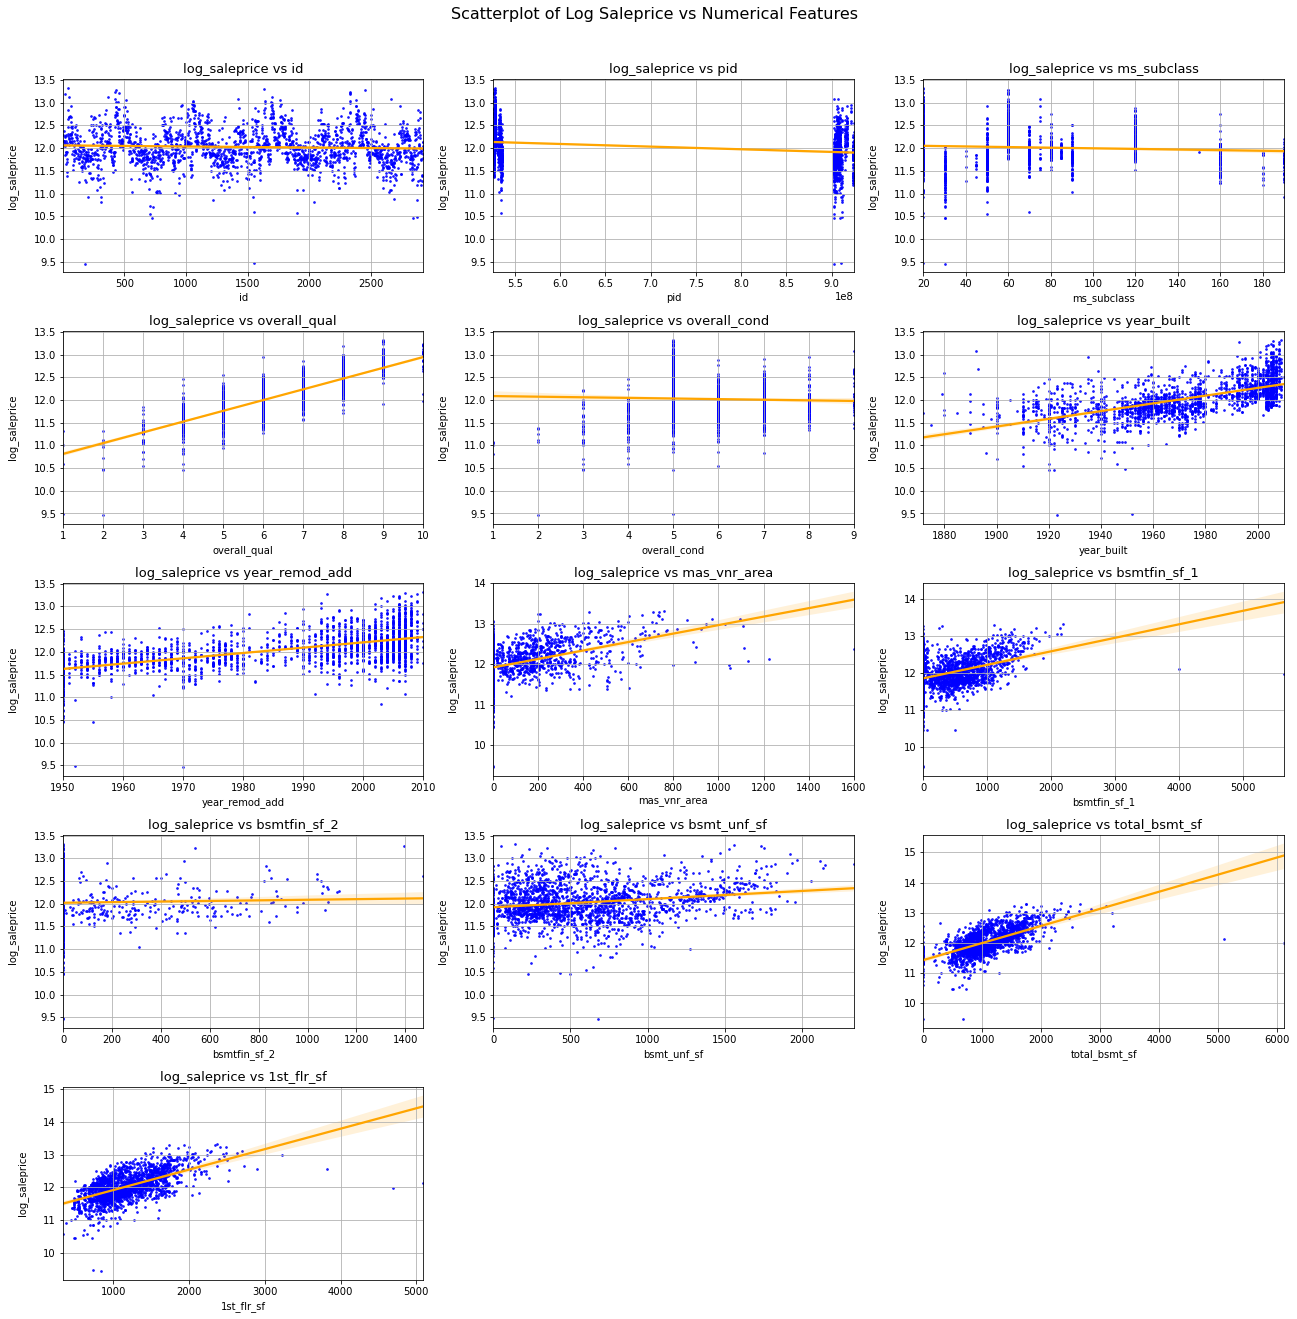

In [142]:
# Plot scatterplot of log_saleprice vs first 13 numerical features

scatterplot(train, num_vars_1, 'log_saleprice')

- <b>id, pid  & ms_subclass</b> don't seem to have a relationship with <b>log_saleprice</b> so can be dropped. In addition, However, in test dataset <b>id</b> will be keep and assign to a new dataframe for kaggle submission requirement.
- <b>log_saleprice, mas_vnr_area, bsmtfin_sf_1, bsmtfin_sf_2, total_bsmt_sf & 1st_flr_sf</b> has an extreme outlier so will be manually remove.
- <b>overall_qual & year_built</b> seem to have a strong positive linear relationship with <b>log_saleprice</b>.

In [143]:
# Drop outliers

train.drop(train[train['log_saleprice'] < 10.5].index, inplace=True)
train.drop(train[train['mas_vnr_area'] > 1000].index, inplace=True)
train.drop(train[train['bsmtfin_sf_1'] > 2000].index, inplace=True)
train.drop(train[train['bsmtfin_sf_2'] > 1200].index, inplace=True)
train.drop(train[train['total_bsmt_sf'] > 3000].index, inplace=True)
train.drop(train[train['1st_flr_sf'] > 3000].index, inplace=True)

In [144]:
# Drop the id, pid & ms_subclass column from train dataset

train.drop(columns = ['id', 'pid', 'ms_subclass'], inplace = True)

# Drop the 'id, pid & ms_subclass column from test dataset
# Assign the test 'id' to a feature to combine to our predict saleprice for submission

test_id = test[['id']]
test.drop(columns = ['id', 'pid', 'ms_subclass'], inplace = True)

In [145]:
# Check the shape of train & test dataset

print(train.shape)
print(test.shape)

(2025, 77)
(878, 76)


In [146]:
# Check the test_id data

test_id.head()

,id
0,2658
1,2718
2,2414
3,1989
4,625


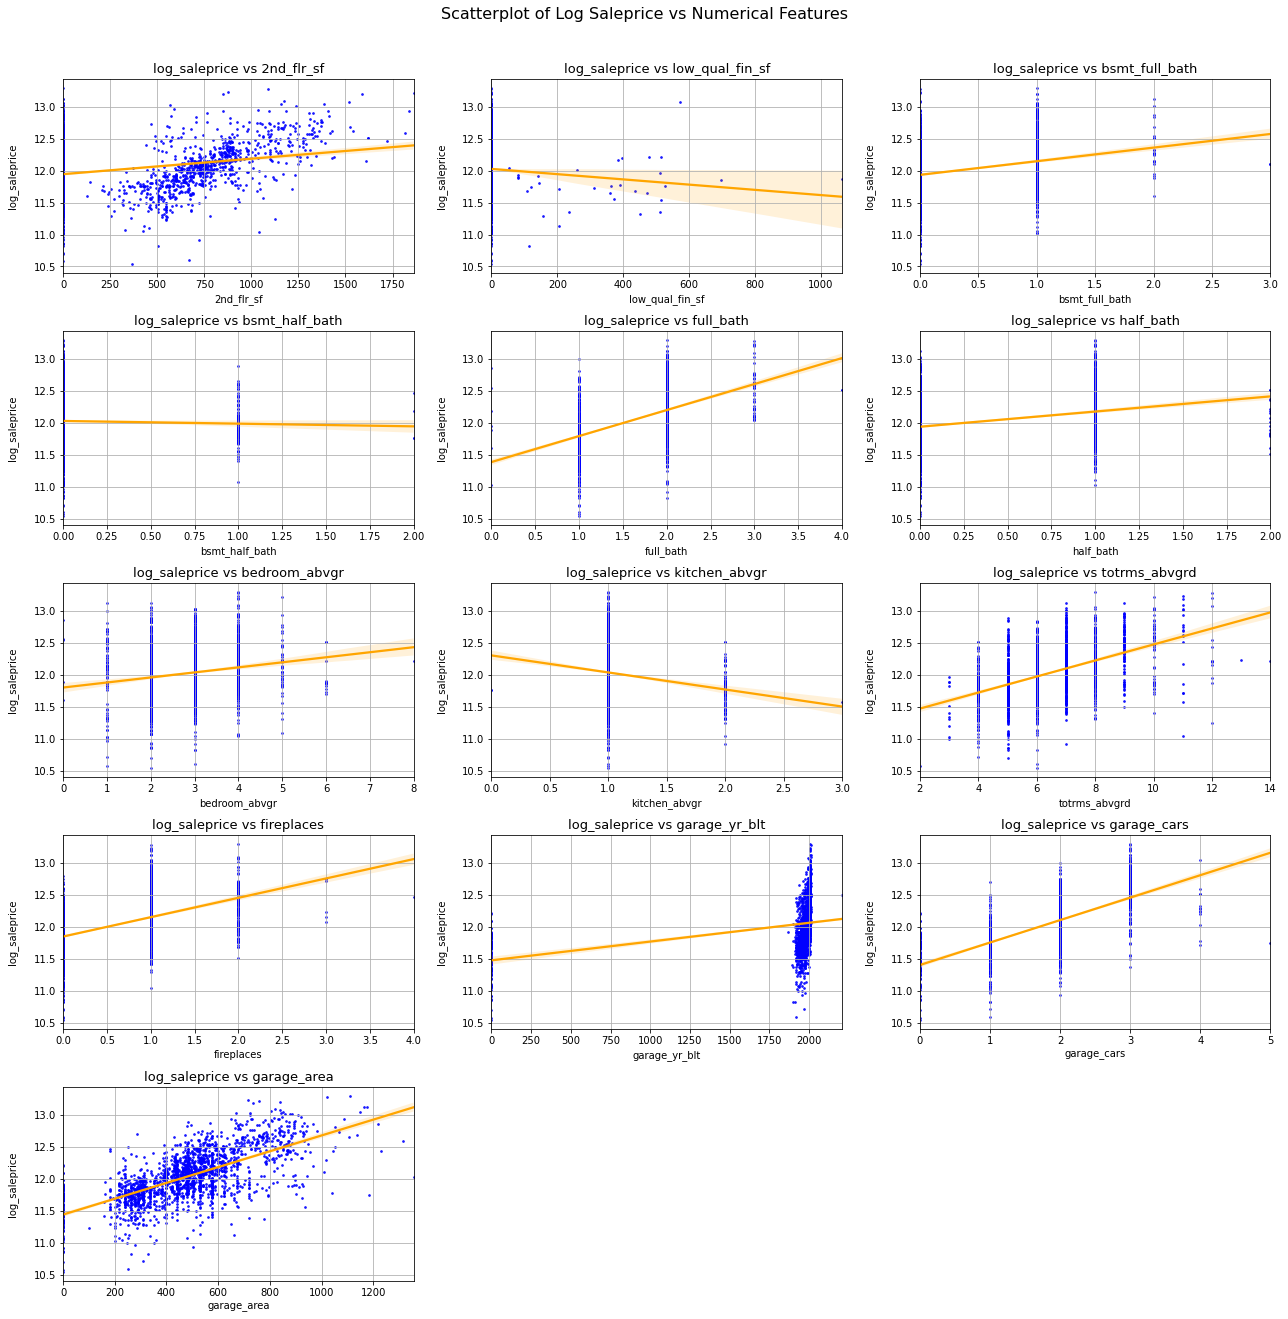

In [147]:
# Plot scatterplot of log_saleprice vs second 13 numerical features

scatterplot(train, num_vars_2, 'log_saleprice')

- <b>low_qual_fin_sf</b> seem to have weak negative linear relationship with <b>log_saleprice</b> so can be dropped.
- <b>garage_yr_blt</b> need to be further analyze due to 0 represent the no garage. To be further analyse.
- <b>garage_area</b> seem to have a strong positive linear relationship with <b>log_saleprice</b> and has an extreme outlier so will be manually remove.
- We can also see that generally the higher the number of a specific property feature (e.g. <b>full_bath, totrms_abvgrd, fireplaces & garage_cars</b>), the higher the <b>log_saleprice</b>.

In [148]:
# Drop outliers

train.drop(train[train['garage_area'] > 1000].index, inplace=True) 

In [149]:
# Drop the 'low_qual_fin_sf' column from train dataset

train.drop(columns = ['low_qual_fin_sf'], inplace = True)

# Drop the 'low_qual_fin_sf' column from test dataset

test.drop(columns = ['low_qual_fin_sf'], inplace = True)

In [150]:
# Check the shape of train & test dataset

print(train.shape)
print(test.shape)

(2005, 76)
(878, 75)


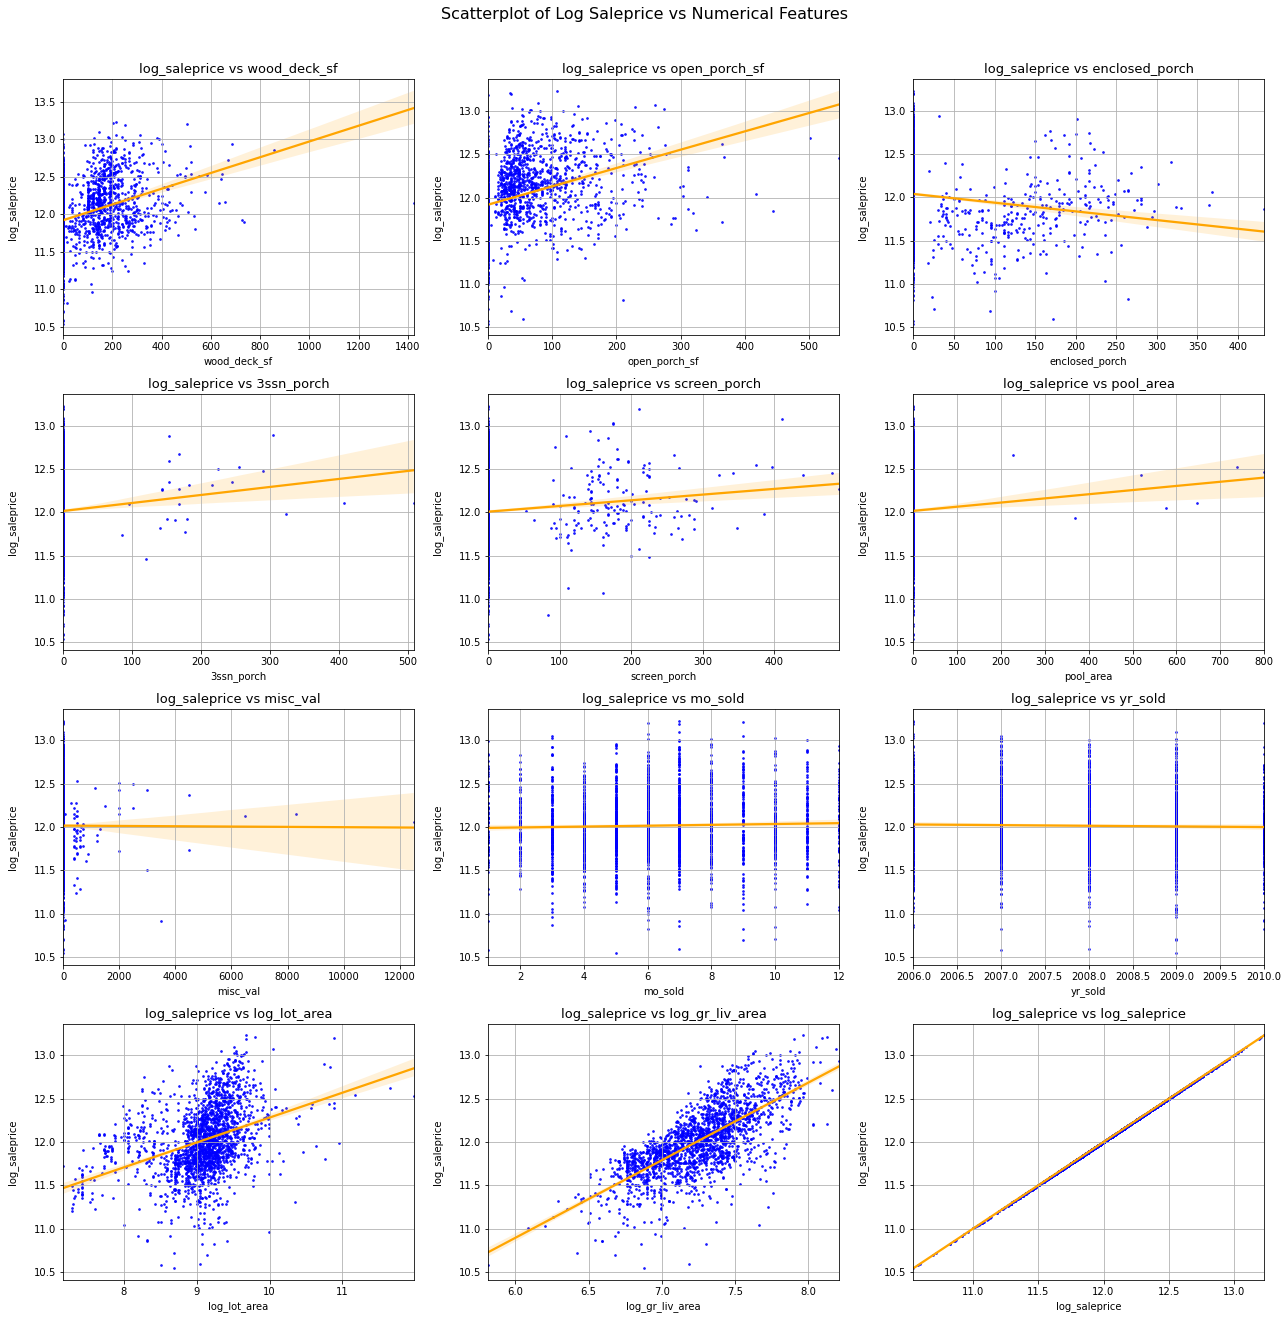

In [151]:
# Plot scatterplot of log_saleprice vs last 12 numerical features

scatterplot(train, num_vars_3, 'log_saleprice')

- <b>log_gr_liv_area</b> seem to have a strong positive linear relationship with <b>log_saleprice</b> and have extreme outlier so will be manually remove.
- <b>wood_deck_sf, open_porch_sf, enclosed_porch</b> have extreme outlier so will be manually remove.
- <b>3ssn_porch, pool_area & misc_val</b> seem to have no linear relationship with <b>log_saleprice</b> so can be dropped.
- <b>mo_sold & yr_sold</b> seem to have no relationship with <b>log_saleprice</b>. This is slightly odd given the financial crisis that occured in 2008.
- <b>log_lot_area</b> seem to have positive linear relationship with <b>log_saleprice</b>. However, most of the data are actually cluster at a small range of area and price vary a lot. So, we decided to drop <b>log_lot_area</b>.

In [152]:
# Drop outliers

train.drop(train[(train['log_gr_liv_area'] > 8)].index, inplace=True)
train.drop(train[train['wood_deck_sf'] > 700].index, inplace=True)
train.drop(train[train['open_porch_sf'] > 400].index, inplace=True)
train.drop(train[train['enclosed_porch'] > 300].index, inplace=True)

In [153]:
# Drop the '3ssn_porch', 'pool_area', 'misc_val' & 'log_lot_area' column from train dataset

train.drop(columns = ['3ssn_porch', 'pool_area', 
                      'misc_val','log_lot_area'], inplace = True)


# Drop the '3ssn_porch', 'pool_area' & 'misc_val' column from test dataset

test.drop(columns = ['3ssn_porch', 'pool_area', 
                     'misc_val','log_lot_area'], inplace = True)


In [154]:
# Check the shape of train & test dataset

print(train.shape)
print(test.shape)

(1978, 72)
(878, 71)


#### 7.2 Visualize Categorical Features

In [155]:
# Get the list of categorical feature

cat_vars = list(train.dtypes[train.dtypes == 'object'].index)

In [156]:
# Number of categorical feature

len(cat_vars)

42

In [157]:
# Display the first 5 rows to visualize

train[cat_vars].head()

,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating,heating_qc,central_air,electrical,kitchen_qual,functional,fireplace_qu,garage_type,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence,misc_feature,sale_type
0,RL,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,Gd,TA,CBlock,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No Misc,WD
1,RL,Pave,No Alley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No Pool,No Fence,No Misc,WD
2,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,No Fireplace,Detchd,Unf,TA,TA,Y,No Pool,No Fence,No Misc,WD
3,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,No Fireplace,BuiltIn,Fin,TA,TA,Y,No Pool,No Fence,No Misc,WD
4,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,TA,TA,PConc,Fa,Gd,No,Unf,Unf,GasA,TA,Y,SBrkr,TA,Typ,No Fireplace,Detchd,Unf,TA,TA,N,No Pool,No Fence,No Misc,WD


- Since the list of categorical feature is long. It would be better to seperate into 5 list to visualize the data.

In [158]:
# Separate the categorical feature list into 5 list

cat_vars_1 = cat_vars[:9]
cat_vars_2 = cat_vars[9:18]
cat_vars_3 = cat_vars[18:27]
cat_vars_4 = cat_vars[27:36]
cat_vars_5 = cat_vars[36:42]

#### 7.2.1 Boxplots

In [159]:
# Define a function to plot boxplot of categorical features vs saleprice

def boxplot(df, y_vars, target):

    # Set the number of rows/columns and figure size for subplots
    nrows = int(np.ceil(len(y_vars)/3)) 
    ncols = 3
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,16))
    
    # Change a multi-dimensional array into a contiguous flattened array.
    ax = ax.ravel()  
    
    # Draw the boxplot
    for i, var in enumerate(y_vars):
        
        # Create a new dataframe of each respective variable with sorting 
        df_1 = pd.DataFrame({col: val[target] for col, val in df.groupby([var])})
        median = df_1.median()
        median.sort_values(ascending=False, inplace=True)
        df_1 = df_1[median.index]
        
        # Set the boxplot properties
        g = sns.boxplot(data = df_1, ax = ax[i], orient='h', width = 0.5)

        # Set the boxplot title, x-label & y_label
        ax[i].set_title(f'{target} vs {var}', fontsize = 13)
        ax[i].set(ylabel = var)
        ax[i].set(xlabel = (f'{target}\n'))
        
     # Hide unused plots
    for i in range(nrows * ncols - len(y_vars)):
        ax[-i-1].set_visible(False) # Start from -1

    plt.suptitle('Boxplot of Log Sale Price vs Categorical Features', fontsize=30, y=1.015)   
    
    plt.tight_layout()

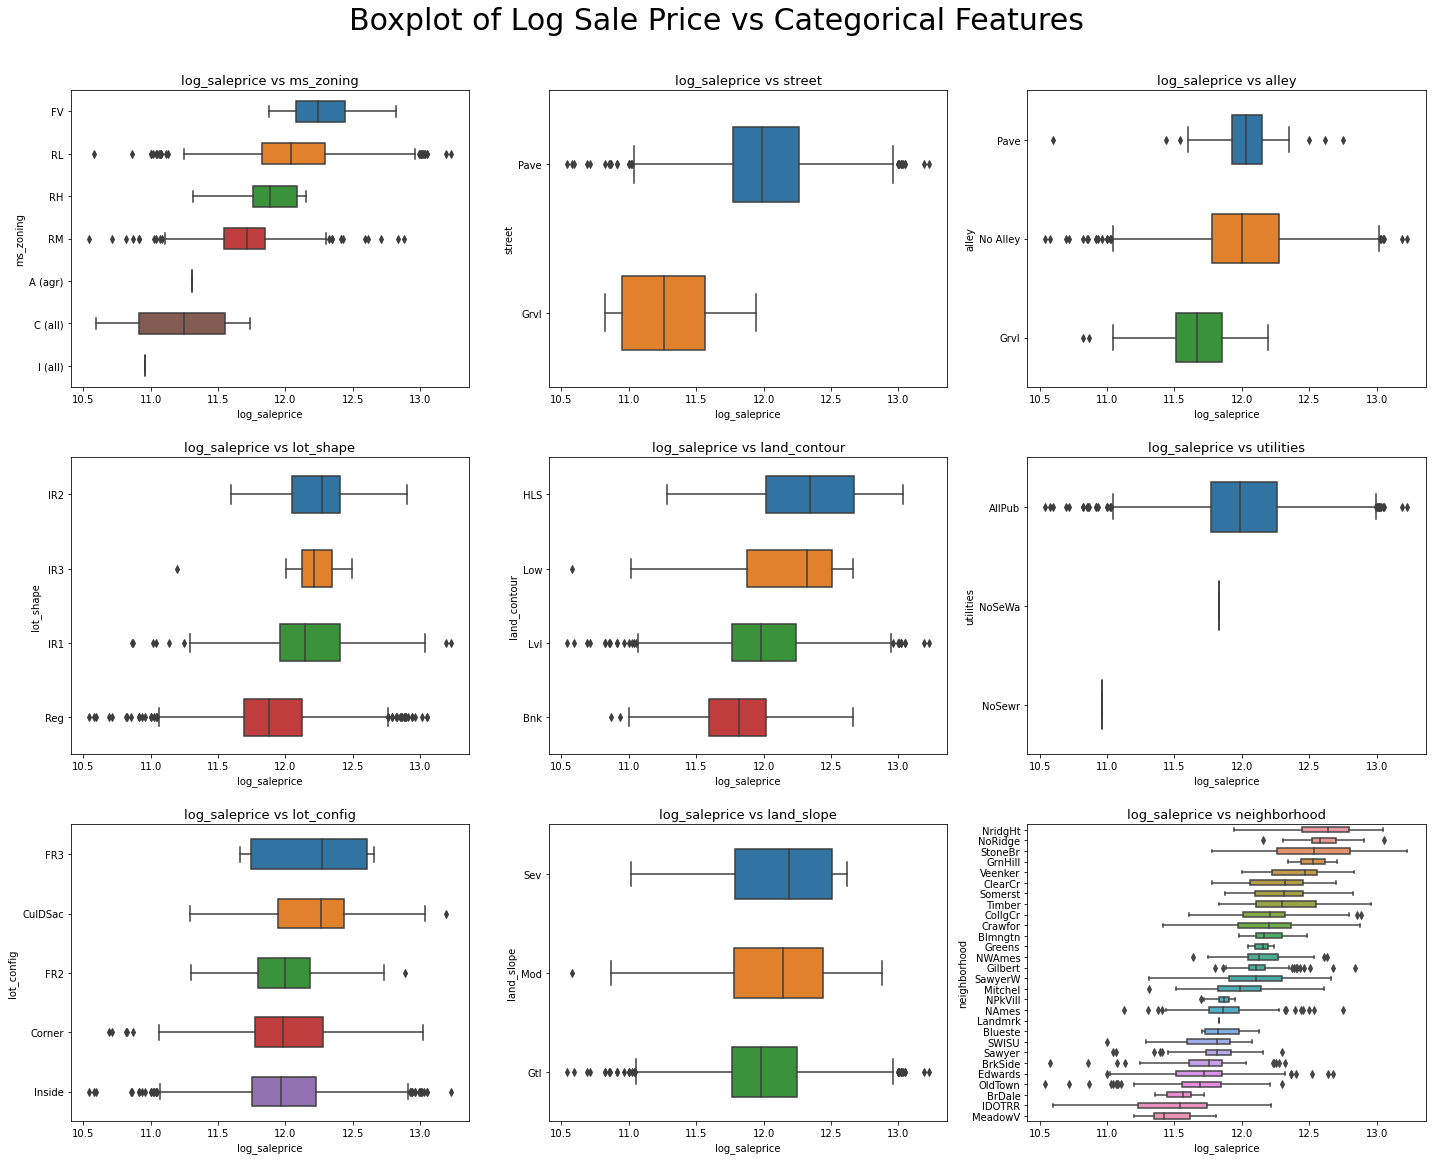

In [160]:
# Plot boxplot of log_saleprice vs first 9 categorical features

boxplot(train, cat_vars_1, 'log_saleprice')

- The <b>ms_zoning</b>, general zoning classification, of type "FV" has the highest median <b>log_saleprice</b> and type "I" has the least median <b>log_saleprice</b>. The unique element of <b>ms_zoning</b> seem to have some error to be corrected.
- The <b>street</b>, type of road access to property, of type "Pave" median <b>log_saleprice</b> is higher compared to "Grvl".
- The <b>land_contour</b>, flatness of the property, of type "Hillside" median <b>log_saleprice</b> is higher compared to "Banked".
- The <b>utilities</b> has most of its values as "AllPub". So it is not an important feature to determine the <b>log_saleprice</b> and can be dropped.
- The <b>neighborhood</b> boxplot data overwheling, to be analyse further.

In [161]:
# Find the unique element of ms_zoning train dataset

train['ms_zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'RH', 'I (all)', 'A (agr)'],
      dtype=object)

In [162]:
# Find the unique element of ms_zoning test dataset

test['ms_zoning'].unique()

array(['RM', 'RL', 'FV', 'RH', 'C (all)', 'I (all)'], dtype=object)

- Based on Data Description document, we found that <b>ms_zoning</b> feature A = Agriculture, I = Industrial & C = Commercial. It is better to rename as per Data Description document for better viewing.
- In addition, train dataset has house under Agriculture Zone, whereas test dataset has no house under Agriculture Zone. Thus, is better to remove house under Agriculture Zone.

In [163]:
# Display the row with ms_zoning under  Agriculture Zone

train[train['ms_zoning'] == 'A (agr)']

,ms_zoning,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,screen_porch,pool_qc,fence,misc_feature,mo_sold,yr_sold,sale_type,log_gr_liv_area,log_saleprice
635,A (agr),Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,None,0.0,TA,Fa,CBlock,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0.0,0.0,1,1,3,1,TA,6,Mod,0,No Fireplace,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,No Pool,No Fence,No Misc,5,2006,WD,7.378384,11.308371


In [164]:
# Drop index 635 house

train.drop(index = 635, inplace = True)

In [165]:
# Replace ms_zoning column values 'C (all)': 'C' & 'I (all)': 'I'

train['ms_zoning'].replace({'C (all)': 'C', 'I (all)': 'I'}, inplace=True)
test['ms_zoning'].replace({'C (all)': 'C', 'I (all)': 'I'}, inplace=True)

In [166]:
# Drop utilities column from train & test dataset

train.drop(columns = ['utilities'], inplace = True)
test.drop(columns = ['utilities'], inplace = True)

In [167]:
# Check the shape of train & test dataset

print(train.shape)
print(test.shape)

(1977, 71)
(878, 70)


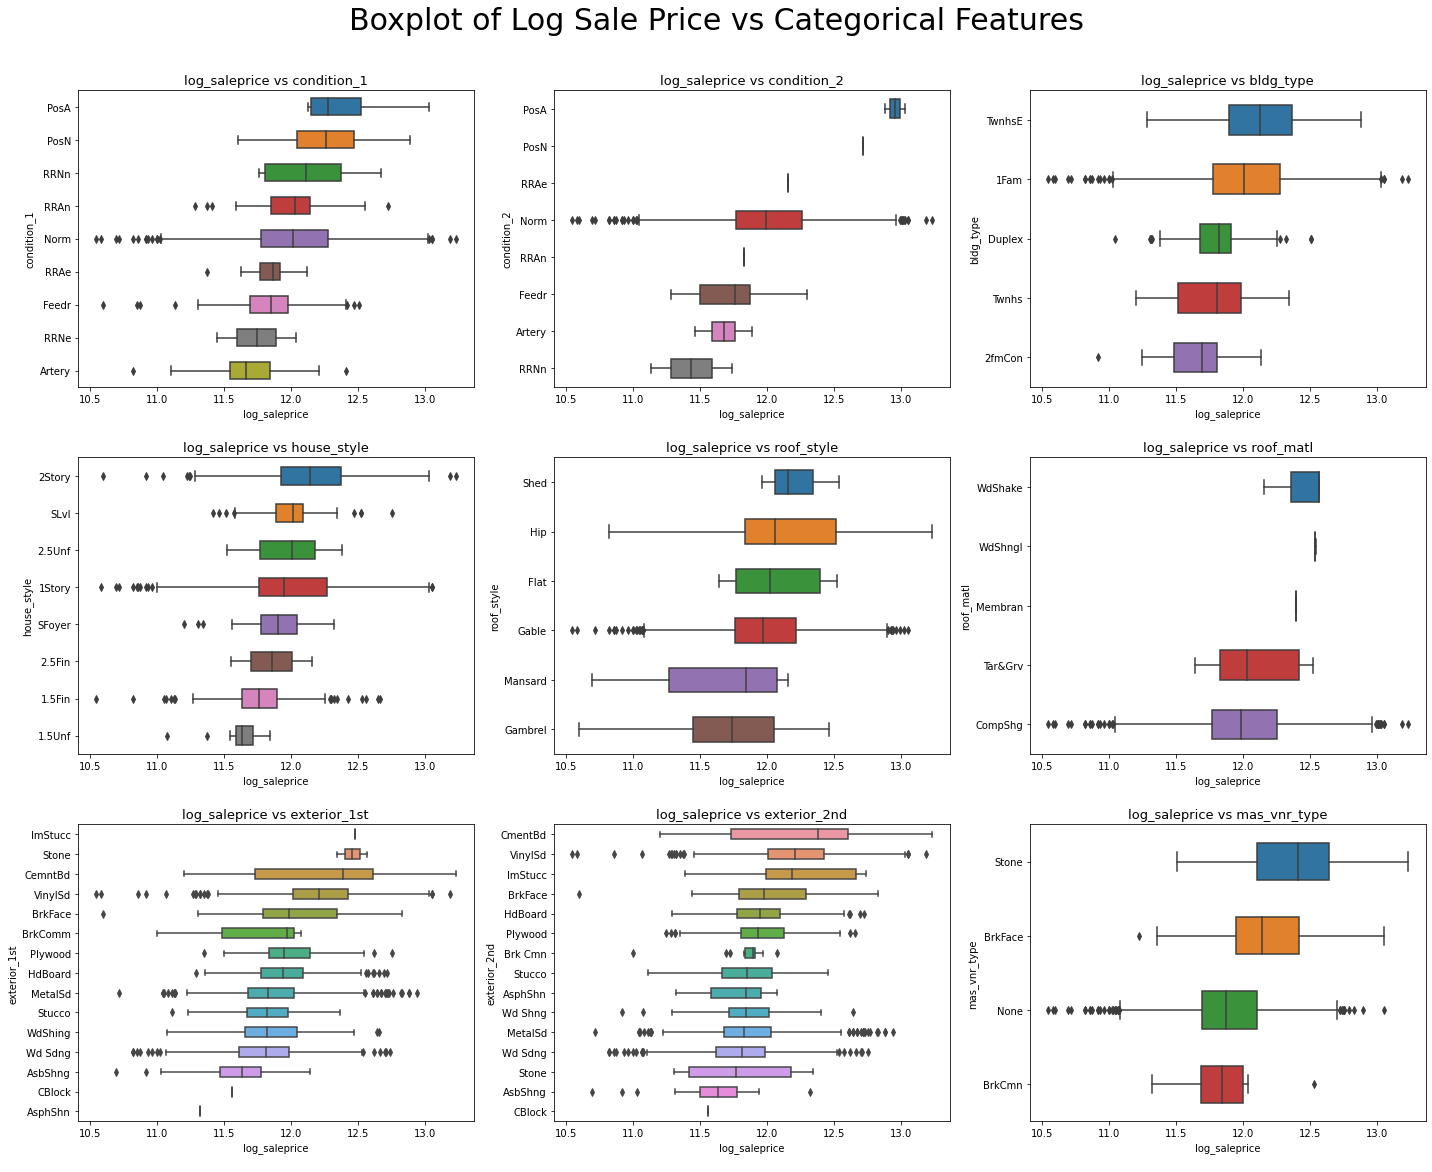

In [168]:
# Plot boxplot of log_saleprice vs second 9 categorical features

boxplot(train, cat_vars_2, 'log_saleprice')

- We can see that several categorical features seem to have a clear relationship with <b>log_saleprice</b>. For example, <b>bldg_type</b>, type of dwelling, which is townhouse end unit tend to have higher median <b>log_saleprice</b> compare to two-family conversion type.
- The house <b>roof_style</b>, type of roof, of type "Shed" has the highest median <b>log_saleprice</b> compared to "Gambrel".
- The house <b>roof_matl</b>, roof material, of type "Wood Shingle" has the highest median <b>log_saleprice</b>. There are also a lot of expensive houses using "Standard Composite Shingle roof".
- The house <b>mas_vnr_type</b>, masonry veneer type, of type "Stone" also has the highest median <b>log_saleprice</b> compared to "Brick Common".

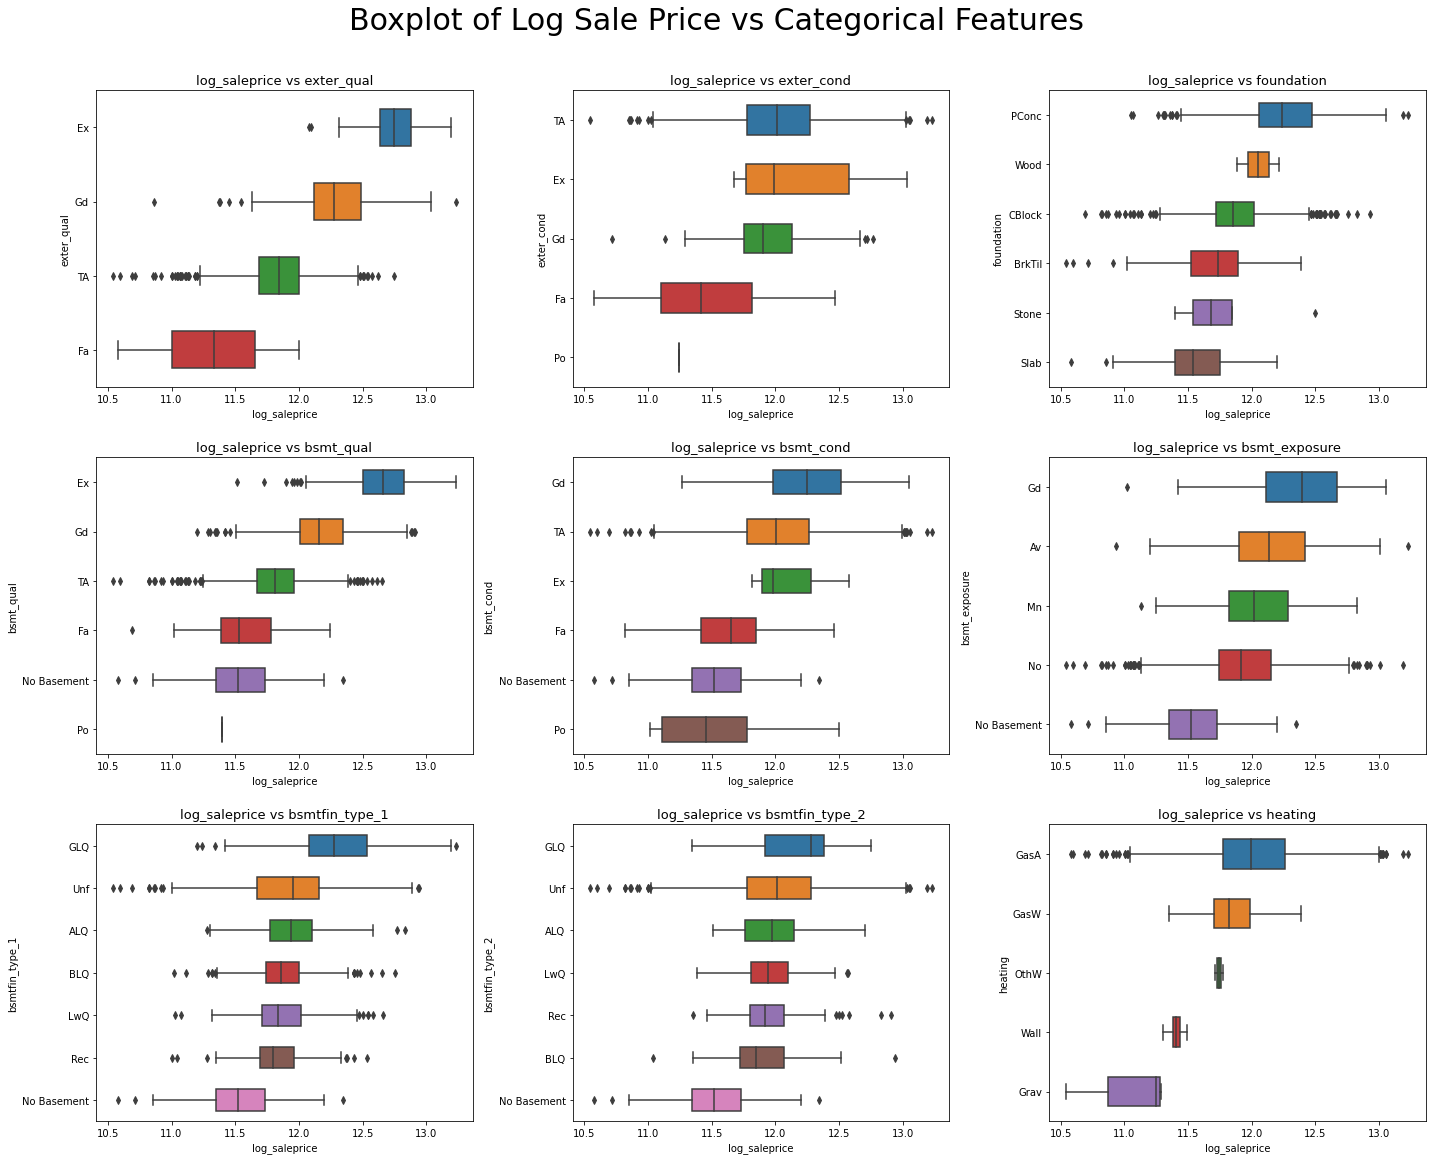

In [169]:
# Plot boxplot of log_saleprice vs third 9 categorical features

boxplot(train, cat_vars_3, 'log_saleprice')

- We can see that several categorical features seem to have a clear relationship with saleprice. For example, housing <b>exter_qual</b> and <b>bsmt_qual</b> of type Excellent has the highest median <b>log_saleprice</b>. 
- The house <b>foundation</b>, type of foundation, of type "Poured Concrete" also has the highest median <b>log_saleprice</b> compared to "Slab".
- Also, house <b>bsmt_exposure</b>, refers to walkout or garden level walls, of "Good Exposure" also has the highest median <b>log_saleprice</b> compared to "No Exposure".
- However, housing <b>exter_cond</b> of the material and also general <b>bsmt_cond</b> of the basement doesn't have a big impact on the <b>log_saleprice</b> as long as it's above average/typical condiction.

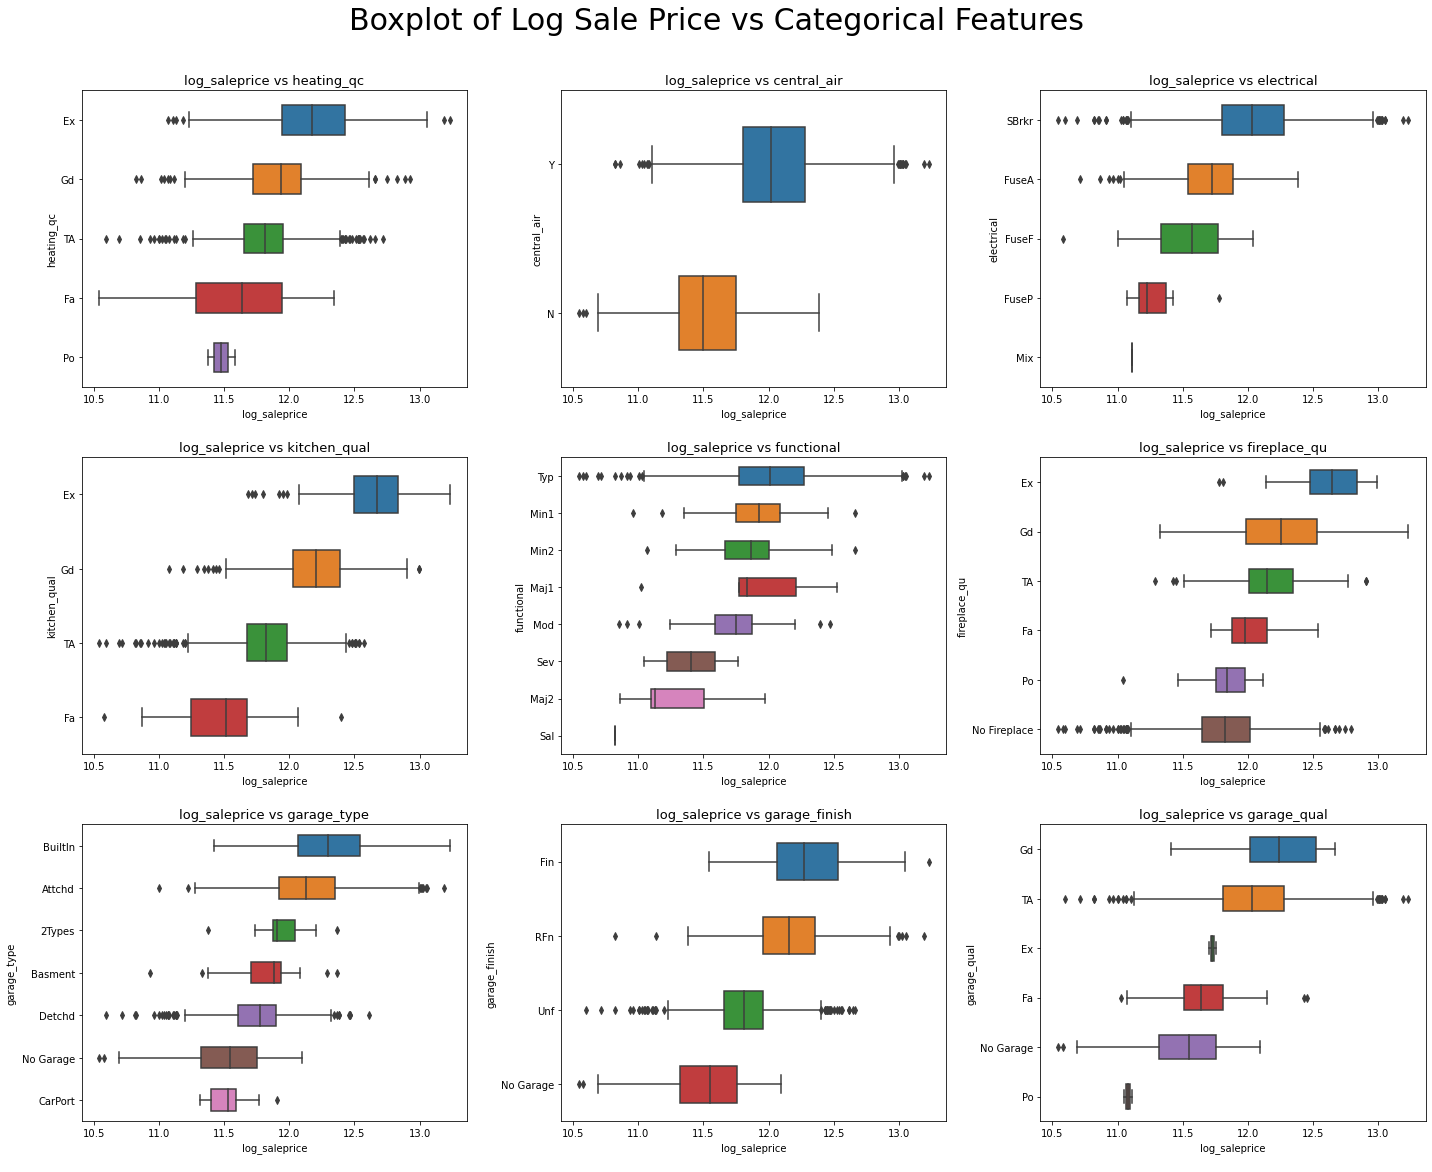

In [170]:
# Plot boxplot of log_saleprice vs fourth 9 categorical features

boxplot(train, cat_vars_4, 'log_saleprice')

- We can also see that housing with high <b>heating_qc</b>, heating quality and condition, tend to have a higher median <b>log_saleprice</b>. This goes without saying for home functionality as well, the more functional the home, the higher the <b>log_saleprice</b>.
- The house with <b>kitchen_qual & fireplace_qu</b>  of type "Excellent" also has the highest median <b>log_saleprice</b>. However, <b>garage_qual</b> doesn't seem to be an important features given that the type "Excellent" is not the highest median <b>log_saleprice</b>. An "Average"/"Good" garage quality has a higher median <b>log_saleprice</b> than "Excellent".

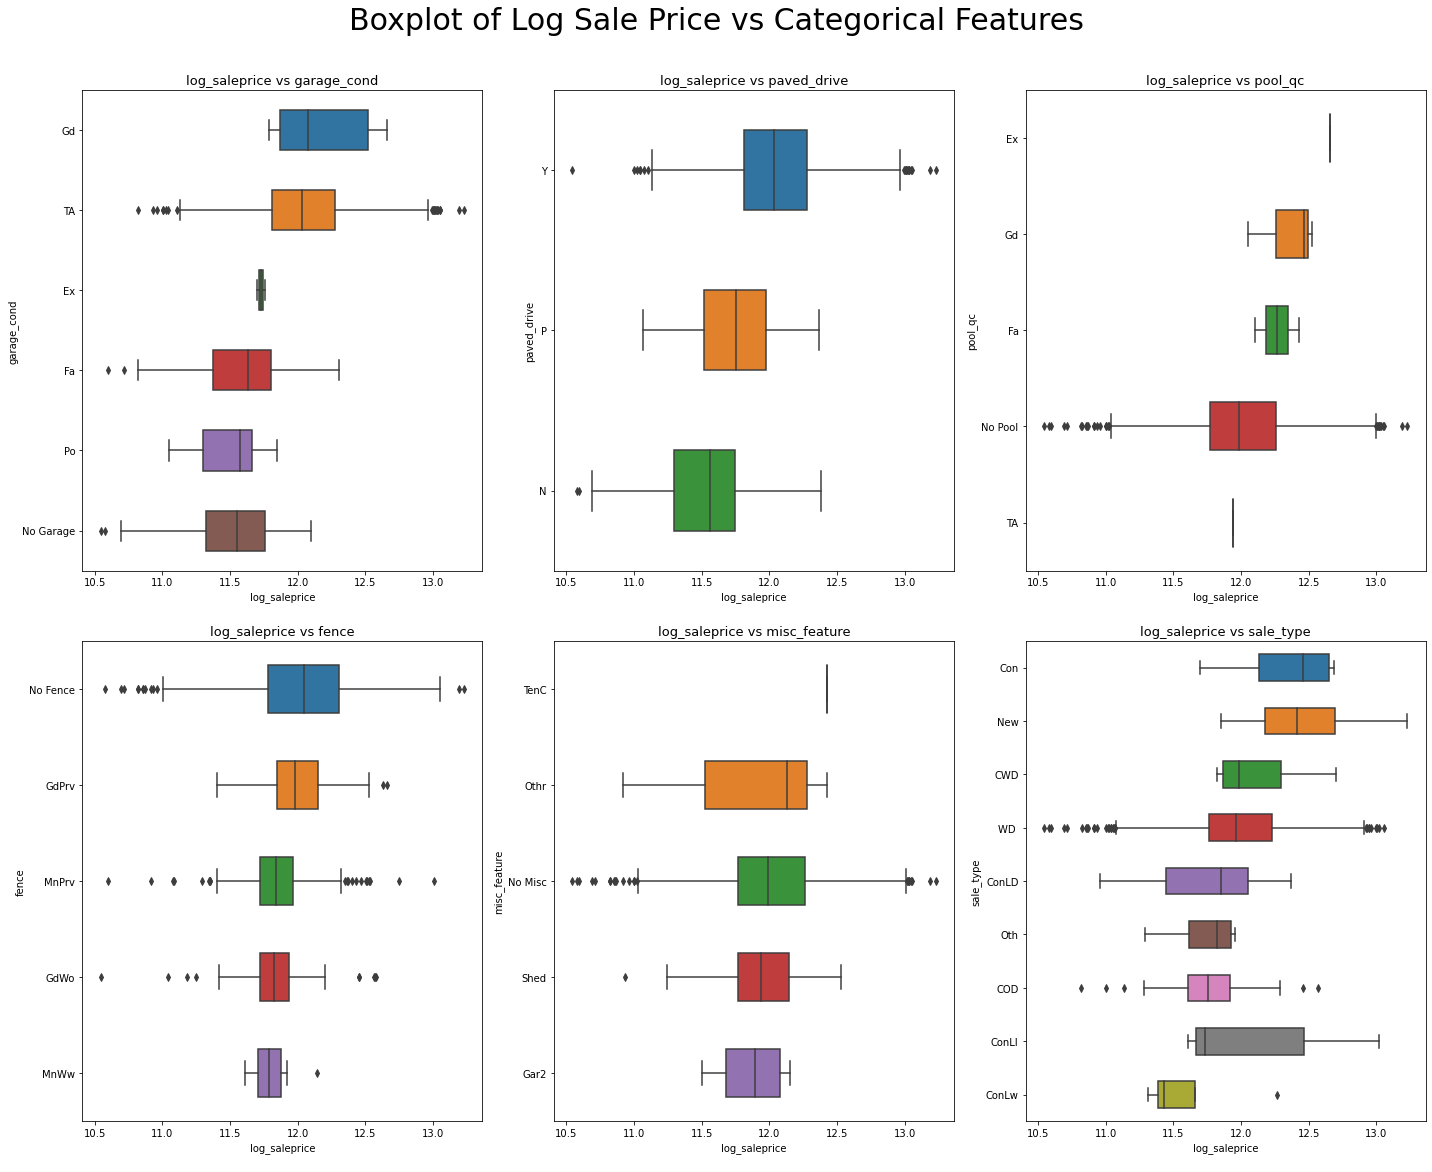

In [171]:
# Plot boxplot of log_saleprice vs last 6 categorical features

boxplot(train, cat_vars_5, 'log_saleprice')

- The house <b>fence</b>, fence quality, seem to have weak relationship with <b>log_saleprice</b> and can be dropped.
- The house <b>pool_qc</b>, pool quality, has most of its values as "No Pool". So it is not an important feature to determine the <b>log_saleprice</b> and can be dropped.

In [172]:
# Drop pool_qc & fence column from train & test dataset

train.drop(columns = ['pool_qc','fence'], inplace = True)
test.drop(columns = ['pool_qc','fence'], inplace = True)

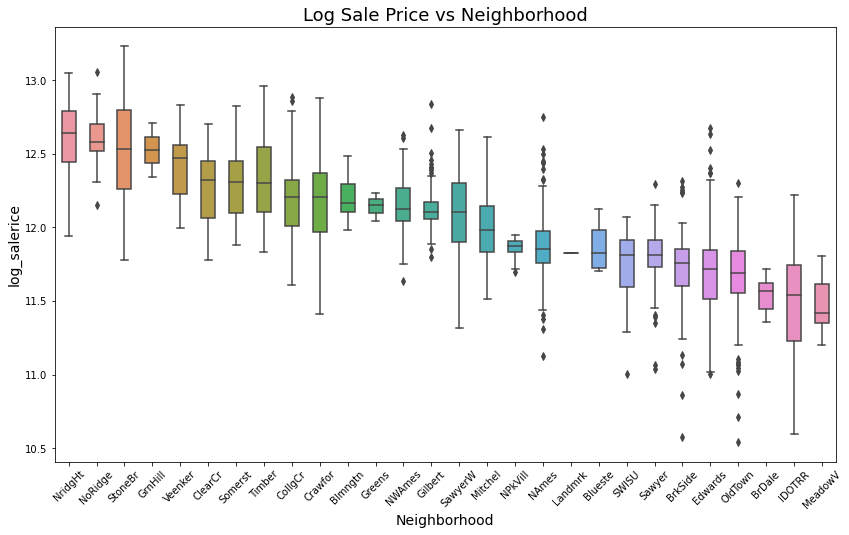

In [173]:
# Plot boxplot of log_saleprice vs neighborhood feature for better viewing

plt.figure(figsize=(14, 8))

df_1 = pd.DataFrame({col: val['log_saleprice'] for col, val in train.groupby(['neighborhood'])})
median = df_1.median()
median.sort_values(ascending=False, inplace=True)
df_1 = df_1[median.index]

sns.boxplot(data = df_1, orient='v', width = 0.5)
plt.xticks(rotation=45);
plt.title('Log Sale Price vs Neighborhood', fontsize=18)
plt.ylabel('log_salerice', fontsize=14)
plt.xlabel('Neighborhood', fontsize=14)
plt.show()


- The <b>neighborhood</b> boxplot is of particular interest. There certain neighborhoods like NridgeHt and NoRidge have much higher median <b>log_saleprice</b> than other neighboods like MeadowV, OldTown and Sawyer.

In [174]:
# Store Cleaned Data for Part 2

train.to_csv('../project_2/datasets/train_clean.csv',index = False)
test.to_csv('../project_2/datasets/test_clean.csv', index = False)
test_id.to_csv('../project_2/datasets/test_id.csv', index = False)

### 8. Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|ms_zoning|object|train_clean.csv|The general zoning classification of the house sale|
|street|object|train_clean.csv|Type of road access to property| 
|alley|object|train_clean.csv|Type of alley access to property|
|lot_shape|object|train_clean.csv|General shape of property| 
|land_contour|object|train_clean.csv|Flatness of the property|
|lot_config|object|train_clean.csv|Lot configuration|
|land_slope|object|train_clean.csv|Slope of property| 
|neighborhood|object|train_clean.csv|Physical locations within Ames city limits| 
|condition_1|object|train_clean.csv|Proximity to various conditions| 
|condition_2|object|train_clean.csv|Proximity to various conditions (if more than one is present)| 
|bldg_type|object|train_clean.csv|Type of dwelling| 
|house_style|object|train_clean.csv|Style of dwelling|
|overall_qual|int64|train_clean.csv|Rates the overall material and finish of the house|  
|overall_cond|int64|train_clean.csv|Rates the overall condition of the house|  
|year_built|int64|train_clean.csv|Original construction date|  
|year_remod_add|int64|train_clean.csv|Remodel date (same as construction date if no remodeling or additions)| 
|roof_style|object|train_clean.csv|Type of roof|
|roof_matl|object|train_clean.csv|Roof material|
|exterior_1st|object|train_clean.csv|Exterior covering on house|
|exterior_2nd|object|train_clean.csv|Exterior covering on house (if more than one material)| 
|mas_vnr_type|object|train_clean.csv|Masonry veneer type|
|mas_vnr_area|float64|train_clean.csv|Masonry veneer area in square feet|
|exter_qual|object|train_clean.csv|Evaluates the quality of the material on the exterior| 
|exter_cond|object|train_clean.csv|Evaluates the present condition of the material on the exterior| 
|foundation|object|train_clean.csv|Type of foundation| 
|bsmt_qual|object|train_clean.csv|Evaluates the height of the basement| 
|bsmt_cond| object|train_clean.csv|Evaluates the general condition of the basement| 
|bsmt_exposure|object|train_clean.csv|Refers to walkout or garden level walls| 
|bsmtfin_type_1|object|train_clean.csv|Rating of Type 1 basement finished area| 
|bsmtfin_sf_1|float64|train_clean.csv|Type 1 finished square feet|
|bsmtfin_type_2|object|train_clean.csv|Rating of Type 2 basement finished area (if multiple types)| 
|bsmtfin_sf_2|float64|train_clean.csv|Type 2 finished square feet|
|bsmt_unf_sf|float64|train_clean.csv|Unfinished square feet of basement area|
|total_bsmt_sf|float64|train_clean.csv|Total square feet of basement area|
|heating|object|train_clean.csv|Type of heating| 
|heating_qc|object|train_clean.csv|Heating quality and condition| 
|central_air|object|train_clean.csv|Central air conditioning| 
|electrical|object|train_clean.csv|Electrical system| 
|1st_flr_sf|int64|train_clean.csv|First Floor square feet|  
|2nd_flr_sf|int64|train_clean.csv|Second floor square feet|  
|log_gr_liv_area|float64|train_clean.csv|Log of grade (ground) living area square feet|
|bsmt_full_bath|float64|train_clean.csv|Basement full bathrooms|
|bsmt_half_bath|float64|train_clean.csv|Basement half bathrooms|
|full_bath|int64|train_clean.csv|Full bathrooms above grade|  
|half_bath|int64|train_clean.csv|Half baths above grade|  
|bedroom_abvgr|int64|train_clean.csv|Bedrooms above grade (does NOT include basement bedrooms)| 
|kitchen_abvgr|int64|train_clean.csv|Kitchens above grade|  
|kitchen_qual|object|train_clean.csv|Kitchen quality| 
|totrms_abvgrd|int64|train_clean.csv|Total rooms above grade (does not include bathrooms)| 
|functional|object|train_clean.csv|Home functionality (Assume typical unless deductions are warranted)| 
|fireplaces|int64|train_clean.csv|Number of fireplaces|  
|fireplace_qu|object|train_clean.csv|Fireplace quality| 
|garage_type|object|train_clean.csv|Garage location|
|garage_yr_blt|float64|train_clean.csv|Year garage was built|
|garage_finish|object|train_clean.csv|Interior finish of the garage| 
|garage_cars|float64|train_clean.csv|Size of garage in car capacity|
|garage_area|float64|train_clean.csv|Size of garage in square feet|
|garage_qual|object|train_clean.csv|Garage quality| 
|garage_cond|object|train_clean.csv|Garage condition| 
|paved_drive|object|train_clean.csv|Paved driveway| 
|wood_deck_sf|int64|train_clean.csv|Wood deck area in square feet|  
|open_porch_sf|int64|train_clean.csv|Open porch area in square feet| 
|enclosed_porch|int64|train_clean.csv|Enclosed porch area in square feet|  
|screen_porch|int64|train_clean.csv|Screen porch area in square feet|  
|misc_feature|object|train_clean.csv|Miscellaneous feature not covered in other categories| 
|mo_sold|int64|train_clean.csv|Month Sold (MM)|
|yr_sold|int64|train_clean.csv|Year Sold (YYYY)|  
|sale_type|object|train_clean.csv|Type of sale| 
|log_saleprice|float64|train_clean.csv|Log Sale price of house|